In [1]:
print("radhe radhe")

radhe radhe


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

# IMPORT DATASET PATH
DATASET_PATH= os.getenv("DATASET_PATH")

In [3]:
import pandas as pd
# LOAD DATASET
df = pd.read_csv(DATASET_PATH,parse_dates=["Year"],dayfirst=False,index_col="Year")
df.tail()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1998-01-01,18.070,21.952,24.778,30.213,32.182,32.721,28.536,28.731,28.450,27.945,23.374,19.761
1999-01-01,18.755,22.955,27.970,32.615,31.950,30.624,28.197,28.106,27.746,27.029,22.881,20.175
2000-01-01,19.627,21.055,26.735,31.532,31.857,30.055,28.693,28.810,27.967,26.983,23.758,18.745
2001-01-01,18.593,22.214,27.048,31.377,32.261,29.266,27.803,28.854,29.007,27.648,24.193,19.848
2002-01-01,19.528,22.792,27.747,30.812,32.780,30.951,29.200,28.106,28.072,26.541,22.598,19.701


### DATA CLEANING

In [4]:
# CHECKING IS NULL VALUE HAVE
df.isna().sum()
# no null value present

Jan    0
Feb    0
Mar    0
Apr    0
May    0
Jun    0
Jul    0
Aug    0
Sep    0
Oct    0
Nov    0
Dec    0
dtype: int64

In [5]:
# checking all datatype 
df.info()

# all value is float and not null 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 1901-01-01 to 2002-01-01
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     102 non-null    float64
 1   Feb     102 non-null    float64
 2   Mar     102 non-null    float64
 3   Apr     102 non-null    float64
 4   May     102 non-null    float64
 5   Jun     102 non-null    float64
 6   Jul     102 non-null    float64
 7   Aug     102 non-null    float64
 8   Sep     102 non-null    float64
 9   Oct     102 non-null    float64
 10  Nov     102 non-null    float64
 11  Dec     102 non-null    float64
dtypes: float64(12)
memory usage: 10.4 KB


## plotting all value  

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


# plotting figure function
def plt_figures(df,title=""):
    
    plt.figure(figsize=(30,20))
    for i,month in enumerate(df.columns):
        plt.subplot(4,3,i+1)
        plt.plot(df[month])
        plt.title(f"{month} {title}")
        plt.xlabel('Year')
        plt.ylabel('Temperature')
        plt.tight_layout()
        
        
    plt.suptitle('Monthly Temperature Trends Over Time',y=1.02)

    plt.show()

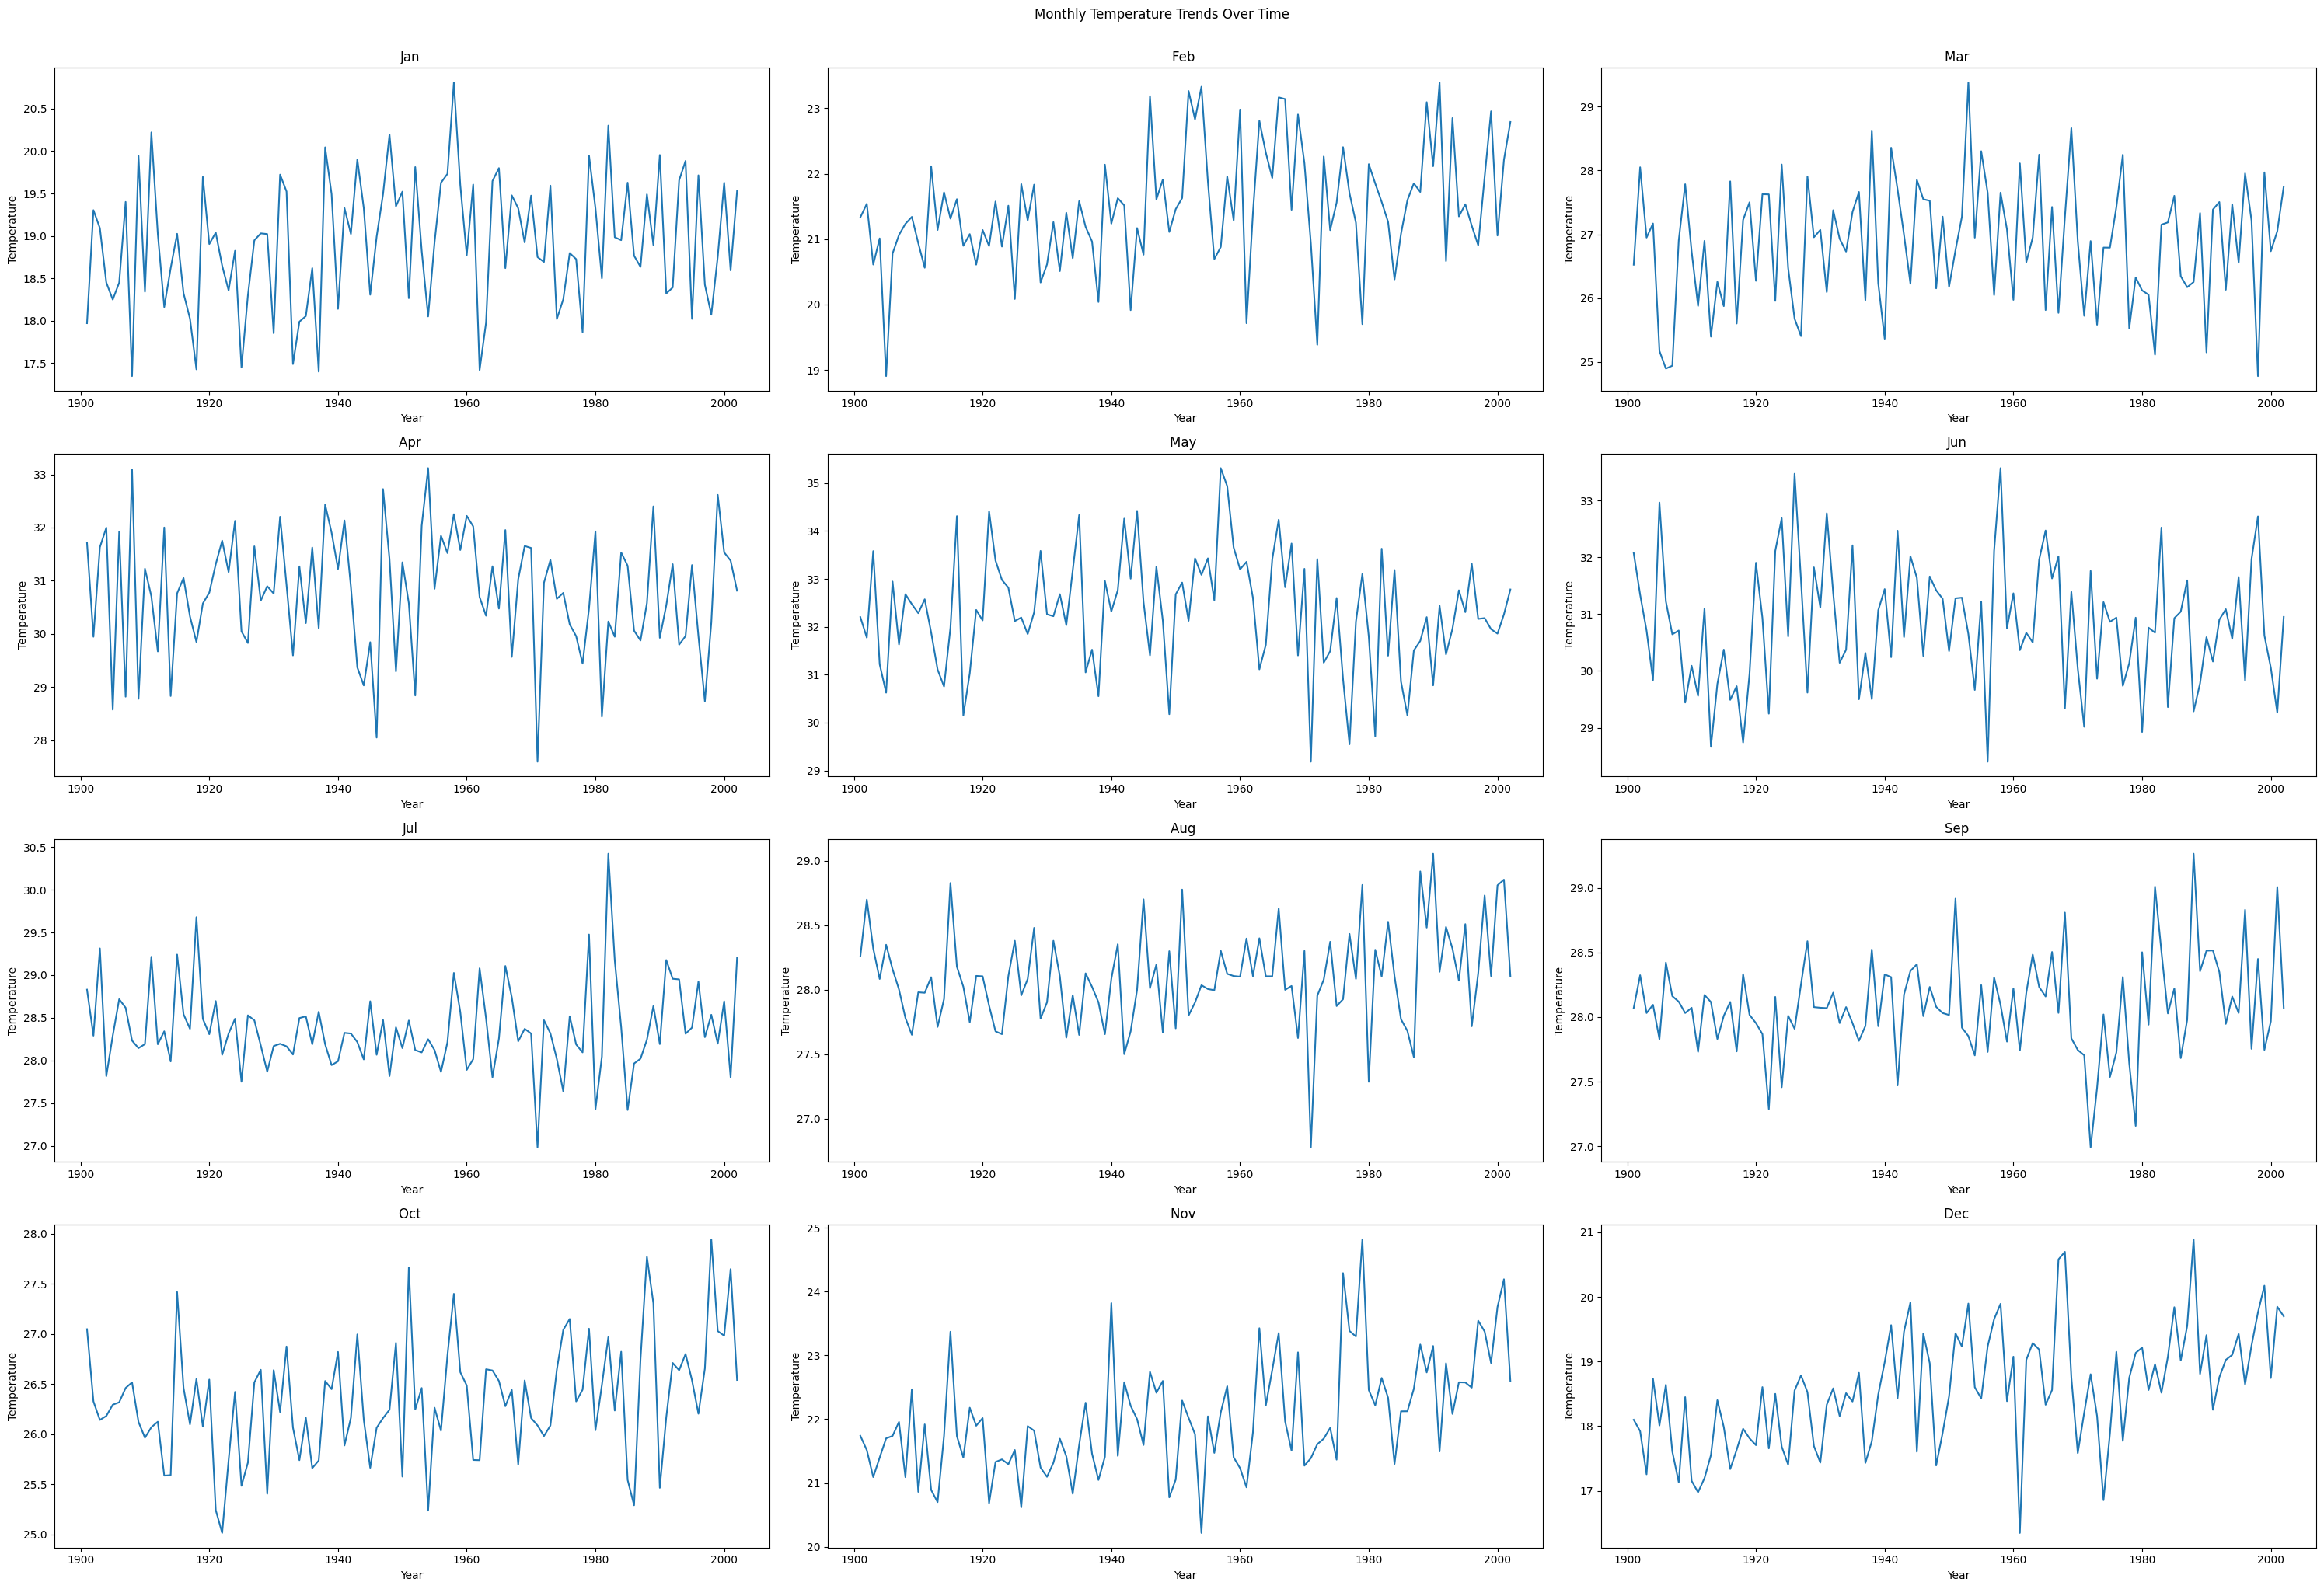

In [7]:
# plot figute
plt_figures(df)

# Data preprocessing  data augmentation  

### Stationary: 
    Defination:
    ""A stationary time series is one where the joint probability distribution of its values at any set of time points is the same as the joint probability distribution of its values at any other set of time points. ""


    condition:
        1. Constant mean 
        2. Constant variance
        3. Autocorrelation structure that does not change with time lag 

## check whether a time series dataset is stationary or not
    1. Visual Inspection
    2. Augmented Dickey-Fuller (ADF) Test
    3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Tes

### Visual Inspection


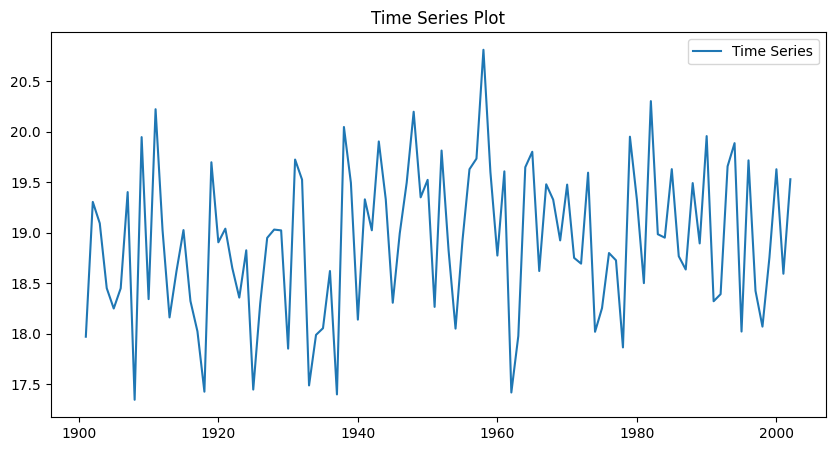

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

month="Jan"
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df[month], label="Time Series")
plt.title("Time Series Plot")
plt.legend()
plt.show()


In [9]:
'''
    by visualizing the plot this is diffucult say 
'''

'\n    by visualizing the plot this is diffucult say \n'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def check_constant_mean(df, column_name, window=10):
    """
    Checks whether a time series has a constant mean.
    
    Parameters:
    - df: pandas DataFrame containing the time series data
    - column_name: str, the column to analyze
    - window: int, size of rolling mean window (default is 10)
    
    Returns:
    - A statement indicating whether the series is globally or locally stationary
    """
    
    # Compute rolling mean
    rolling_mean = df[column_name].rolling(window=window).mean()

    # Plot original data and rolling mean
    plt.figure(figsize=(10, 5))
    plt.plot(df[column_name], label="Original Data", alpha=0.5)
    plt.plot(rolling_mean, label=f"Rolling Mean (Window={window})", color="red")
    plt.title(f"Rolling Mean Check for {column_name}")
    plt.legend()
    plt.show()

    # Define window size for segmenting the data
    window_size = len(df) // 3  # Split into 3 equal parts
    print(f"The window size is {window_size}")

    # Compute mean in each segment
    mean_1 = df[column_name][:window_size].mean()
    mean_2 = df[column_name][window_size:2*window_size].mean()
    mean_3 = df[column_name][2*window_size:].mean()

    print(f"Mean in Segment 1: {mean_1:.3f}")
    print(f"Mean in Segment 2: {mean_2:.3f}")
    print(f"Mean in Segment 3: {mean_3:.3f}")
    
    # Check if means are close within a tolerance
    if np.isclose(mean_1, mean_2, atol=0.1) and np.isclose(mean_2, mean_3, atol=0.1):
        print("The series is globally stationary.")
        return 1
    else:
        print("The series is locally stationary.")
        return 0


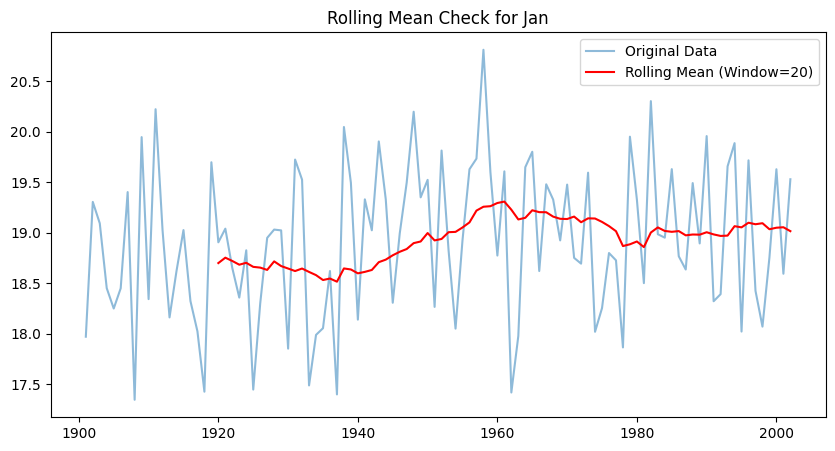

The window size is 34
Mean in Segment 1: 18.652
Mean in Segment 2: 19.102
Mean in Segment 3: 18.984
The series is locally stationary.
The mean of 'Jan' is not constant


In [11]:
if check_constant_mean(df,"Jan",20):
    print("The mean of 'Jan' is constant")
else: print("The mean of 'Jan' is not constant")

#  conclution not constant mean

In [12]:
# check constant verience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bartlett, levene

def check_constant_variance(df, column_name, window=10):
    """
    Checks whether a time series has a constant variance.
    
    Parameters:
    - df: pandas DataFrame containing the time series data
    - column_name: str, the column to analyze
    - window: int, size of rolling standard deviation window (default is 10)
    
    Returns:
    - A statement indicating whether the series has constant or changing variance.
    """
    
    # Compute rolling standard deviation
    rolling_std = df[column_name].rolling(window=window).std()

    # Plot original data and rolling std deviation
    plt.figure(figsize=(10, 5))
    plt.plot(df[column_name], label="Original Data", alpha=0.5)
    plt.plot(rolling_std, label=f"Rolling Std Dev (Window={window})", color="red")
    plt.title(f"Rolling Standard Deviation for {column_name}")
    plt.legend()
    plt.show()

    # Define window size for segmenting the data
    window_size = len(df) // 3  # Split into 3 equal parts
    print(f"The window size is {window_size}")

    # Compute variance in each segment
    var_1 = np.var(df[column_name][:window_size], ddof=1)
    var_2 = np.var(df[column_name][window_size:2*window_size], ddof=1)
    var_3 = np.var(df[column_name][2*window_size:], ddof=1)

    print(f"Variance in Segment 1: {var_1:.3f}")
    print(f"Variance in Segment 2: {var_2:.3f}")
    print(f"Variance in Segment 3: {var_3:.3f}")

    # Check if variances are close within a tolerance
    if np.isclose(var_1, var_2, atol=0.1) and np.isclose(var_2, var_3, atol=0.1):
        print("The variance is stable → Homoscedastic (Constant Variance).")
        return 1
    else:
        print("The variance is not stable → Heteroscedastic (Non-Constant Varianc).")
        return 0

    # # Statistical test: Bartlett’s test (assumes normality)
    # bartlett_test = bartlett(df[column_name][:window_size], 
    #                         df[column_name][window_size:2*window_size], 
    #                         df[column_name][2*window_size:])
    
    # # Statistical test: Levene’s test (does not assume normality)
    # levene_test = levene(df[column_name][:window_size], 
    #                     df[column_name][window_size:2*window_size], 
    #                     df[column_name][2*window_size:])

    # print(f"Bartlett's test p-value: {bartlett_test.pvalue:.3f}")
    # print(f"Levene's test p-value: {levene_test.pvalue:.3f}")

    # if bartlett_test.pvalue < 0.05 or levene_test.pvalue < 0.05:
    #     return variance_status + " (Confirmed by statistical tests: Variance is NOT constant)"
    # else:
    #     return variance_status + " (Confirmed by statistical tests: Variance is constant)"



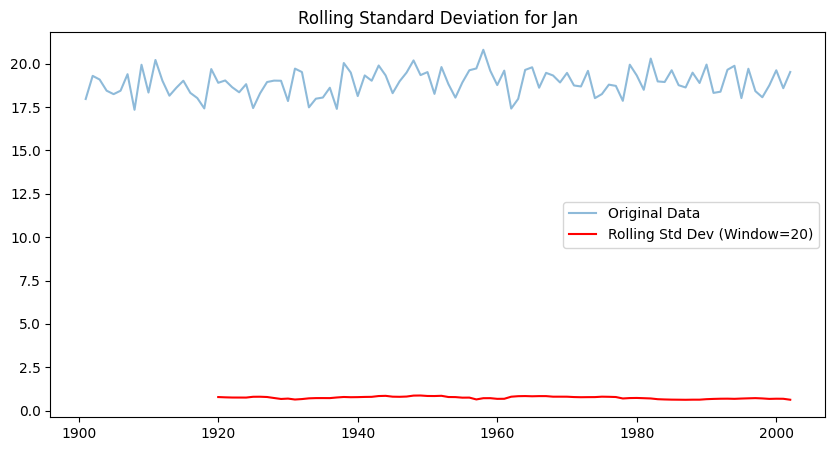

The window size is 34
Variance in Segment 1: 0.547
Variance in Segment 2: 0.640
Variance in Segment 3: 0.423
The variance is not stable → Heteroscedastic (Non-Constant Varianc).
The variance of the data is not constant.


In [13]:
if check_constant_variance(df,"Jan",20):
    print("The variance of the data is constant.")
else:
    print("The variance of the data is not constant.")

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, q_stat
from statsmodels.graphics.tsaplots import plot_acf

def check_autocorrelation_stability(df, column_name, max_lag=20):
    """
    Checks if the autocorrelation structure remains stable over time.
    
    Parameters:
    - df: pandas DataFrame containing the time series data
    - column_name: str, the column to analyze
    - max_lag: int, number of lags to consider in ACF (default is 20)
    
    Returns:
    - Plots the ACF in different segments to compare structure.
    """
    
    # Compute ACF for the full data
    plt.figure(figsize=(12, 5))
    plot_acf(df[column_name], lags=max_lag, title="ACF of Full Data")
    plt.show()
    
    # Define window size
    window_size = len(df) // 3  # Split into 3 equal parts
    print(f"Window size: {window_size}")

    # Compute ACF for three different segments
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for i, start in enumerate(range(0, len(df), window_size)):
        segment = df[column_name][start:start + window_size]
        plot_acf(segment, lags=max_lag, ax=axes[i])
        axes[i].set_title(f"ACF - Segment {i+1}")

    plt.tight_layout()
    plt.show()
    
    # Perform Ljung-Box test to check if ACF changes significantly
    ljung_box_pvalues = q_stat(acf(df[column_name], nlags=max_lag, fft=False)[1:], len(df))[1]
    
    if np.any(ljung_box_pvalues < 0.05):
        print("Ljung-Box test: Autocorrelation structure changes over time → Not stationary.")
        return 1
    else:
        print("Ljung-Box test: Autocorrelation structure remains stable → Likely stationary.")
        return 0



<Figure size 1200x500 with 0 Axes>

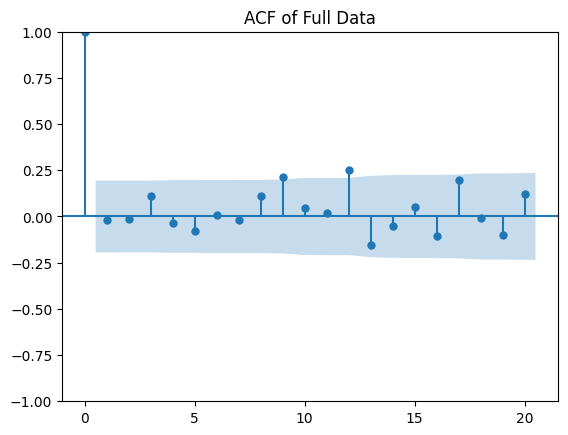

Window size: 34


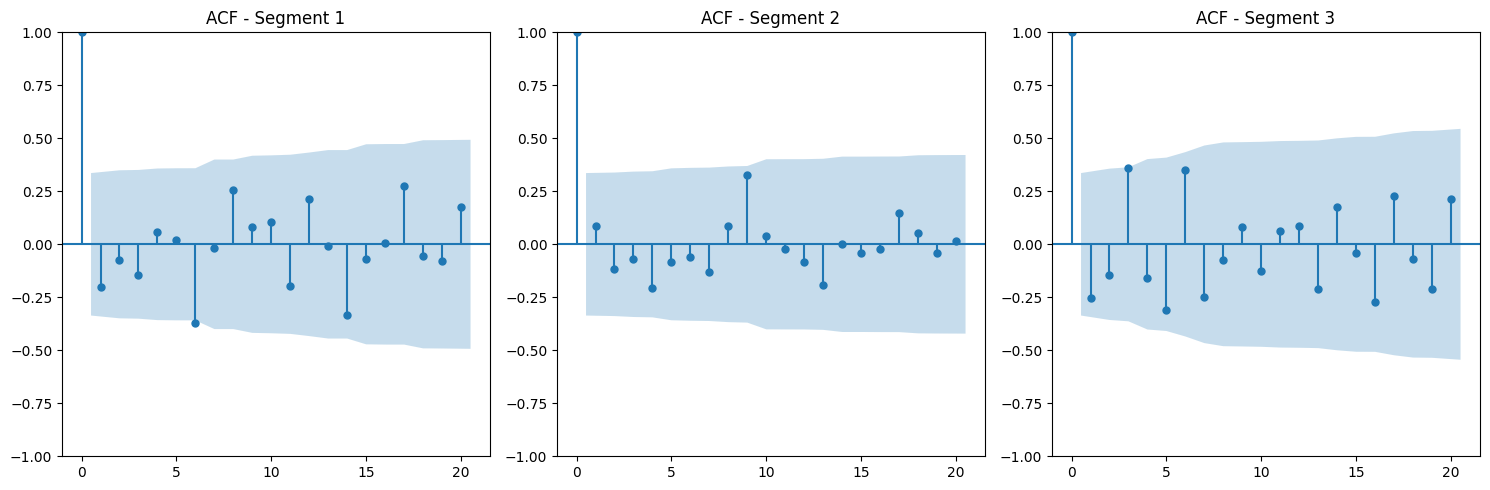

Ljung-Box test: Autocorrelation structure remains stable → Likely stationary.


0

In [15]:
check_autocorrelation_stability(df,"Jan")

In [16]:
# by manual 
# 1. not const mean
# 2. not const std
# 3. no auto correlation 

# conclution not stationary

###  2. Augmented Dickey-Fuller (ADF) Test

In [17]:
from statsmodels.tsa.stattools import adfuller

def check_ADF_stationarity(df, column):
    """
    Performs the Augmented Dickey-Fuller test to check for stationarity.

    Parameters:
    - df: pandas DataFrame containing the time series data
    - column: str, the column to analyze

    Prints:
    - ADF Statistic
    - p-value
    - Critical values
    - Stationarity conclusion
    """
    result = adfuller(df[column])

    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")

    if result[1] < 0.05:
        print("✅ The time series is **stationary** (rejects H0).")
        return 1
    else:
        print("❌ The time series is **non-stationary** (fails to reject H0).")
        return 0




In [18]:
check_ADF_stationarity(df,"Jan")

ADF Statistic: -10.1995
p-value: 0.0000
Critical Values:
   1%: -3.4968
   5%: -2.8906
   10%: -2.5823
✅ The time series is **stationary** (rejects H0).


1

###     3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Tes

In [19]:
from statsmodels.tsa.stattools import kpss

def check_kpss_stationarity(df, column):
    """
    Performs the KPSS test to check for stationarity.

    Parameters:
    - df: pandas DataFrame containing the time series data
    - column: str, the column to analyze

    Prints:
    - KPSS Statistic
    - p-value
    - Critical values
    - Stationarity conclusion
    """
    result = kpss(df[column], regression="c", nlags="auto")

    print(f"KPSS Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[3].items():
        print(f"   {key}: {value:.4f}")

    if result[1] < 0.05:
        print("❌ The time series is **non-stationary** (rejects H0).")
        return 0
    else:
        print("✅ The time series is **stationary** (fails to reject H0).")
        return 1



In [20]:
check_kpss_stationarity(df,"Jan")

KPSS Statistic: 0.4741
p-value: 0.0475
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
❌ The time series is **non-stationary** (rejects H0).


0

In [21]:
# by kpss test not stationary
# and adf test this is starionary

# conclution 
# tha data set is not stationary

In [22]:
month="Jan"
if check_ADF_stationarity(df,month) and check_kpss_stationarity(df,month):
    print("Stationarity and trend are present in the data for month", month)
else:
    print("Stationarity and trend are not present in the data for month", month)

ADF Statistic: -10.1995
p-value: 0.0000
Critical Values:
   1%: -3.4968
   5%: -2.8906
   10%: -2.5823
✅ The time series is **stationary** (rejects H0).
KPSS Statistic: 0.4741
p-value: 0.0475
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
❌ The time series is **non-stationary** (rejects H0).
Stationarity and trend are not present in the data for month Jan


In [23]:
adfuller(df.Jan)

(np.float64(-10.199462333043286),
 np.float64(6.02367960644157e-18),
 0,
 101,
 {'1%': np.float64(-3.4968181663902103),
  '5%': np.float64(-2.8906107514600103),
  '10%': np.float64(-2.5822770483285953)},
 np.float64(200.90611534804947))

In [24]:
kpss(df.Jan)

(np.float64(0.47414575053259106),
 np.float64(0.04748969582599301),
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(df, column_name):
    """
    Check if a time series is stationary using both ADF and KPSS tests.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the time series data.
    column_name (str): The column to check for stationarity.

    Returns:
    dict: A dictionary containing ADF & KPSS results along with a conclusion.
    """
    data = df[column_name].dropna()
    is_stationary = 0  # Default: Assume non-stationary

    # ADF Test
    adf_result = adfuller(data)
    adf_stat, adf_p_value, _, _, adf_crit_values = adf_result[:5]

    # KPSS Test (Handling possible exceptions)
    try:
        kpss_result = kpss(data, regression="c", nlags="auto")
        kpss_stat, kpss_p_value, _, kpss_crit_values = kpss_result
    except ValueError as e:
        print(f"⚠️ KPSS Test Warning: {e}")
        kpss_stat, kpss_p_value, kpss_crit_values = None, None, None

    # print("\n🚀 Checking Stationarity for:", column_name)
    # print("=" * 50)

    # # ADF Test Results
    # print("📌 ADF Test Results:")
    # print(f"ADF Statistic: {adf_stat:.4f}")
    # print(f"p-value: {adf_p_value:.4f}")
    # print(f"Critical Values: {adf_crit_values}")

    # # KPSS Test Results (if available)
    # if kpss_stat is not None:
    #     print("\n📌 KPSS Test Results:")
    #     print(f"KPSS Statistic: {kpss_stat:.4f}")
    #     print(f"p-value: {kpss_p_value:.4f}")
    #     print(f"Critical Values: {kpss_crit_values}")

    # Decision Logic
    if adf_p_value < 0.05 and kpss_p_value is not None and kpss_p_value > 0.05:
        is_stationary = 1
        conclusion = "✅ The series is **Stationary**."
    elif adf_p_value > 0.05 and kpss_p_value is not None and kpss_p_value < 0.05:
        conclusion = "❌ The series is **Non-Stationary**."
    elif adf_p_value < 0.05 and kpss_p_value is not None and kpss_p_value < 0.05:
        conclusion = "⚠️ The series is **Trend Stationary** (Detrending may be needed)."
    else:
        conclusion = "❓ Inconclusive results. Further analysis required."

    # print(f"\n📢  month: {column_name}  \n   Conclusion: {conclusion}")

    # Return results in a structured dictionary
    return {
        "month": column_name,
        "adf_p": round(adf_p_value, 4),
        "kpss_p": round(kpss_p_value, 4) if kpss_p_value is not None else None,
        "is_sta": bool(is_stationary),
        "conclusion": conclusion
    }


In [26]:
stationaty_result_monthly=check_stationarity(df, "Jan")

In [27]:
result=[]
colums=["MONTH",   "ADF-TEST",    "KPSS-TEST",   "STATIONARY" ,    "CONCLUTION" ]

for month in df.columns:
    data=[]
    stationaty_result_monthly=check_stationarity(df, month)
    data.append(stationaty_result_monthly["month"])
    data.append(float(stationaty_result_monthly["adf_p"]))
    data.append(float(stationaty_result_monthly["kpss_p"]))
    data.append(stationaty_result_monthly["is_sta"])
    data.append(stationaty_result_monthly["conclusion"])
    result.append(data)

stationaty_result=pd.DataFrame(result,columns=colums)

C:\Users\subha\AppData\Local\Temp\ipykernel_16456\109972868.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(data, regression="c", nlags="auto")
C:\Users\subha\AppData\Local\Temp\ipykernel_16456\109972868.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(data, regression="c", nlags="auto")
C:\Users\subha\AppData\Local\Temp\ipykernel_16456\109972868.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(data, regression="c", nlags="auto")
C:\Users\subha\AppData\Local\Temp\ipykernel_16456\109972868.py:26: InterpolationWarning: The test statistic is outside of the r

In [28]:
import pandas as pd

def check_all_months_stationarity(df):
    """
    Check stationarity for all months in the DataFrame using ADF and KPSS tests.

    Parameters:
    df (pd.DataFrame): DataFrame containing monthly time series data.

    Returns:
    pd.DataFrame: DataFrame containing stationarity results for each month.
    """
    columns = ["MONTH", "ADF-TEST", "KPSS-TEST", "STATIONARY", "CONCLUSION"]
    results = []

    for month in df.columns:  # Iterate over each month column
        stationarity_result = check_stationarity(df, month)  # Function returns a tuple

        # Unpacking tuple
        month_name, adf_p, kpss_p, is_stationary, conclusion = stationarity_result

        # Append results
        results.append([month_name, adf_p, kpss_p, is_stationary, conclusion])

    # Convert results into a DataFrame
    stationary_result_df = pd.DataFrame(results, columns=columns)

    return stationary_result_df  # Return the DataFrame



In [29]:
stationary_result_df = check_all_months_stationarity(df)

C:\Users\subha\AppData\Local\Temp\ipykernel_16456\109972868.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(data, regression="c", nlags="auto")
C:\Users\subha\AppData\Local\Temp\ipykernel_16456\109972868.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(data, regression="c", nlags="auto")
C:\Users\subha\AppData\Local\Temp\ipykernel_16456\109972868.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(data, regression="c", nlags="auto")
C:\Users\subha\AppData\Local\Temp\ipykernel_16456\109972868.py:26: InterpolationWarning: The test statistic is outside of the r

In [30]:
stationaty_result

,MONTH,ADF-TEST,KPSS-TEST,STATIONARY,CONCLUTION
0,Jan,0.0000,0.0475,False,⚠️ The series is **Trend Stationary** (Detrend...
1,Feb,0.0000,0.0100,False,⚠️ The series is **Trend Stationary** (Detrend...
2,Mar,0.0000,0.1000,True,✅ The series is **Stationary**.
3,Apr,0.0000,0.1000,True,✅ The series is **Stationary**.
4,May,0.0000,0.1000,True,✅ The series is **Stationary**.
5,Jun,0.0000,0.1000,True,✅ The series is **Stationary**.
6,Jul,0.0000,0.1000,True,✅ The series is **Stationary**.
7,Aug,0.0000,0.0571,True,✅ The series is **Stationary**.
8,Sep,0.0000,0.1000,True,✅ The series is **Stationary**.
9,Oct,0.0000,0.0100,False,⚠️ The series is **Trend Stationary** (Detrend...


In [31]:
# finding d value
non_stationary_col=[month for i,month in enumerate(stationaty_result.MONTH)  if stationaty_result.STATIONARY[i]==False  ]
    

In [32]:
non_stationary_col

['Jan', 'Feb', 'Oct', 'Nov', 'Dec']

In [33]:
import numpy as np
import pandas as pd
import warnings
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning

# Suppress InterpolationWarnings from KPSS test
warnings.simplefilter("ignore", InterpolationWarning)

def find_d_val(df, column_name):
    """
    Check if a time series is stationary using both ADF and KPSS tests.
    If non-stationary, apply first-order differencing and re-evaluate.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the time series data.
    column_name (str): The column to check for stationarity.

    Returns:
    dict: A dictionary containing month and d value d mean order of diffrence .
    """
    data = df[column_name].dropna()
    is_stationary = False  # Default: Assume non-stationary
    d=-1
    while not is_stationary:
        # ADF Test
        adf_result = adfuller(data)
        adf_p_value = round(adf_result[1], 4)

        # KPSS Test with error handling
        try:
            kpss_result = kpss(data, regression="c", nlags="auto")
            kpss_p_value = round(kpss_result[1], 4)
        except ValueError as e:
            print(f"⚠️ KPSS Test Warning for {column_name}: {e}")
            kpss_p_value = None  # Assign None if KPSS fails

        # Decision Logic
        if adf_p_value < 0.05 and (kpss_p_value is None or kpss_p_value > 0.05):
            is_stationary = True
        d+=1
        data=data.diff().dropna()
        
    # Initial results
    result = {
        "month": column_name,
        "d": d
    }
    return result



In [34]:
result = find_d_val(df, "Dec")
print(result)

{'month': 'Dec', 'd': 2}


In [35]:
import pandas as pd

def find_all_columns_d_val(df):
    """
    Check stationarity for all months in the DataFrame using ADF and KPSS tests.

    Parameters:
    df (pd.DataFrame): DataFrame containing monthly time series data.

    Returns:
    pd.DataFrame: DataFrame containing stationarity results for each month.
    """
    columns = ["MONTH", "d"]
    results = []

    for month in df.columns:  # Iterate over each month column
        result = find_d_val(df, month)  # Function returns a dect

        # Append results
        results.append([result["month"], result["d"]])

    # Convert results into a DataFrame
    d_result_df = pd.DataFrame(results, columns=columns)
    
    return d_result_df  # Return the DataFrame



In [36]:
all_months_d_val=find_all_columns_d_val(df)
all_months_d_val

,MONTH,d
0,Jan,1
1,Feb,1
2,Mar,0
3,Apr,0
4,May,0
5,Jun,0
6,Jul,0
7,Aug,0
8,Sep,0
9,Oct,1


In [37]:
# get diff value
def get_diff_value(df,column,diff):
    val=df[column]
    if diff:
        return df[column].diff(diff)
    else:
        return val.diff() # by default first diffrance you can change it if you want

In [38]:
columns_diff=[f"{month}_diff"  for month in df.columns]
all_stationary_data=pd.DataFrame()


In [39]:
all_stationary_data

""


In [40]:
# get stationary dataset
for i,month in enumerate(all_months_d_val.MONTH):
    d_val=all_months_d_val.d[i]
    all_stationary_data[columns_diff[i]]=get_diff_value(df,month,d_val) # you can put"d_val" instate of 1

In [41]:
all_stationary_data

,Jan_diff,Feb_diff,Mar_diff,Apr_diff,May_diff,Jun_diff,Jul_diff,Aug_diff,Sep_diff,Oct_diff,Nov_diff,Dec_diff
Year,,,,,,,,,,,,
1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-01-01,1.334,0.206,1.527,-1.767,-0.429,-0.732,-0.539,0.439,0.253,-0.721,-0.224,NaN
1903-01-01,-0.212,-0.929,-1.102,1.684,1.808,-0.634,1.022,-0.379,-0.293,-0.185,-0.422,-0.845
1904-01-01,-0.642,0.400,0.221,0.369,-2.364,-0.870,-1.496,-0.237,0.064,0.040,0.305,0.813
1905-01-01,-0.201,-2.107,-1.996,-3.424,-0.592,3.126,0.474,0.266,-0.266,0.112,0.302,0.756
...,...,...,...,...,...,...,...,...,...,...,...,...
1998-01-01,-0.354,1.046,-2.435,1.482,0.017,0.753,0.263,0.604,0.696,1.290,-0.170,1.114
1999-01-01,0.685,1.003,3.192,2.402,-0.232,-2.097,-0.339,-0.625,-0.704,-0.916,-0.493,0.926
2000-01-01,0.872,-1.900,-1.235,-1.083,-0.093,-0.569,0.496,0.704,0.221,-0.046,0.877,-1.016


In [42]:
all_stationary_data.dropna(inplace=True)

In [43]:
all_stationary_data

,Jan_diff,Feb_diff,Mar_diff,Apr_diff,May_diff,Jun_diff,Jul_diff,Aug_diff,Sep_diff,Oct_diff,Nov_diff,Dec_diff
Year,,,,,,,,,,,,
1903-01-01,-0.212,-0.929,-1.102,1.684,1.808,-0.634,1.022,-0.379,-0.293,-0.185,-0.422,-0.845
1904-01-01,-0.642,0.400,0.221,0.369,-2.364,-0.870,-1.496,-0.237,0.064,0.040,0.305,0.813
1905-01-01,-0.201,-2.107,-1.996,-3.424,-0.592,3.126,0.474,0.266,-0.266,0.112,0.302,0.756
1906-01-01,0.200,1.875,-0.277,3.352,2.321,-1.740,0.427,-0.190,0.593,0.024,0.038,-0.094
1907-01-01,0.952,0.285,0.045,-3.108,-1.315,-0.581,-0.100,-0.157,-0.260,0.143,0.220,-0.403
...,...,...,...,...,...,...,...,...,...,...,...,...
1998-01-01,-0.354,1.046,-2.435,1.482,0.017,0.753,0.263,0.604,0.696,1.290,-0.170,1.114
1999-01-01,0.685,1.003,3.192,2.402,-0.232,-2.097,-0.339,-0.625,-0.704,-0.916,-0.493,0.926
2000-01-01,0.872,-1.900,-1.235,-1.083,-0.093,-0.569,0.496,0.704,0.221,-0.046,0.877,-1.016


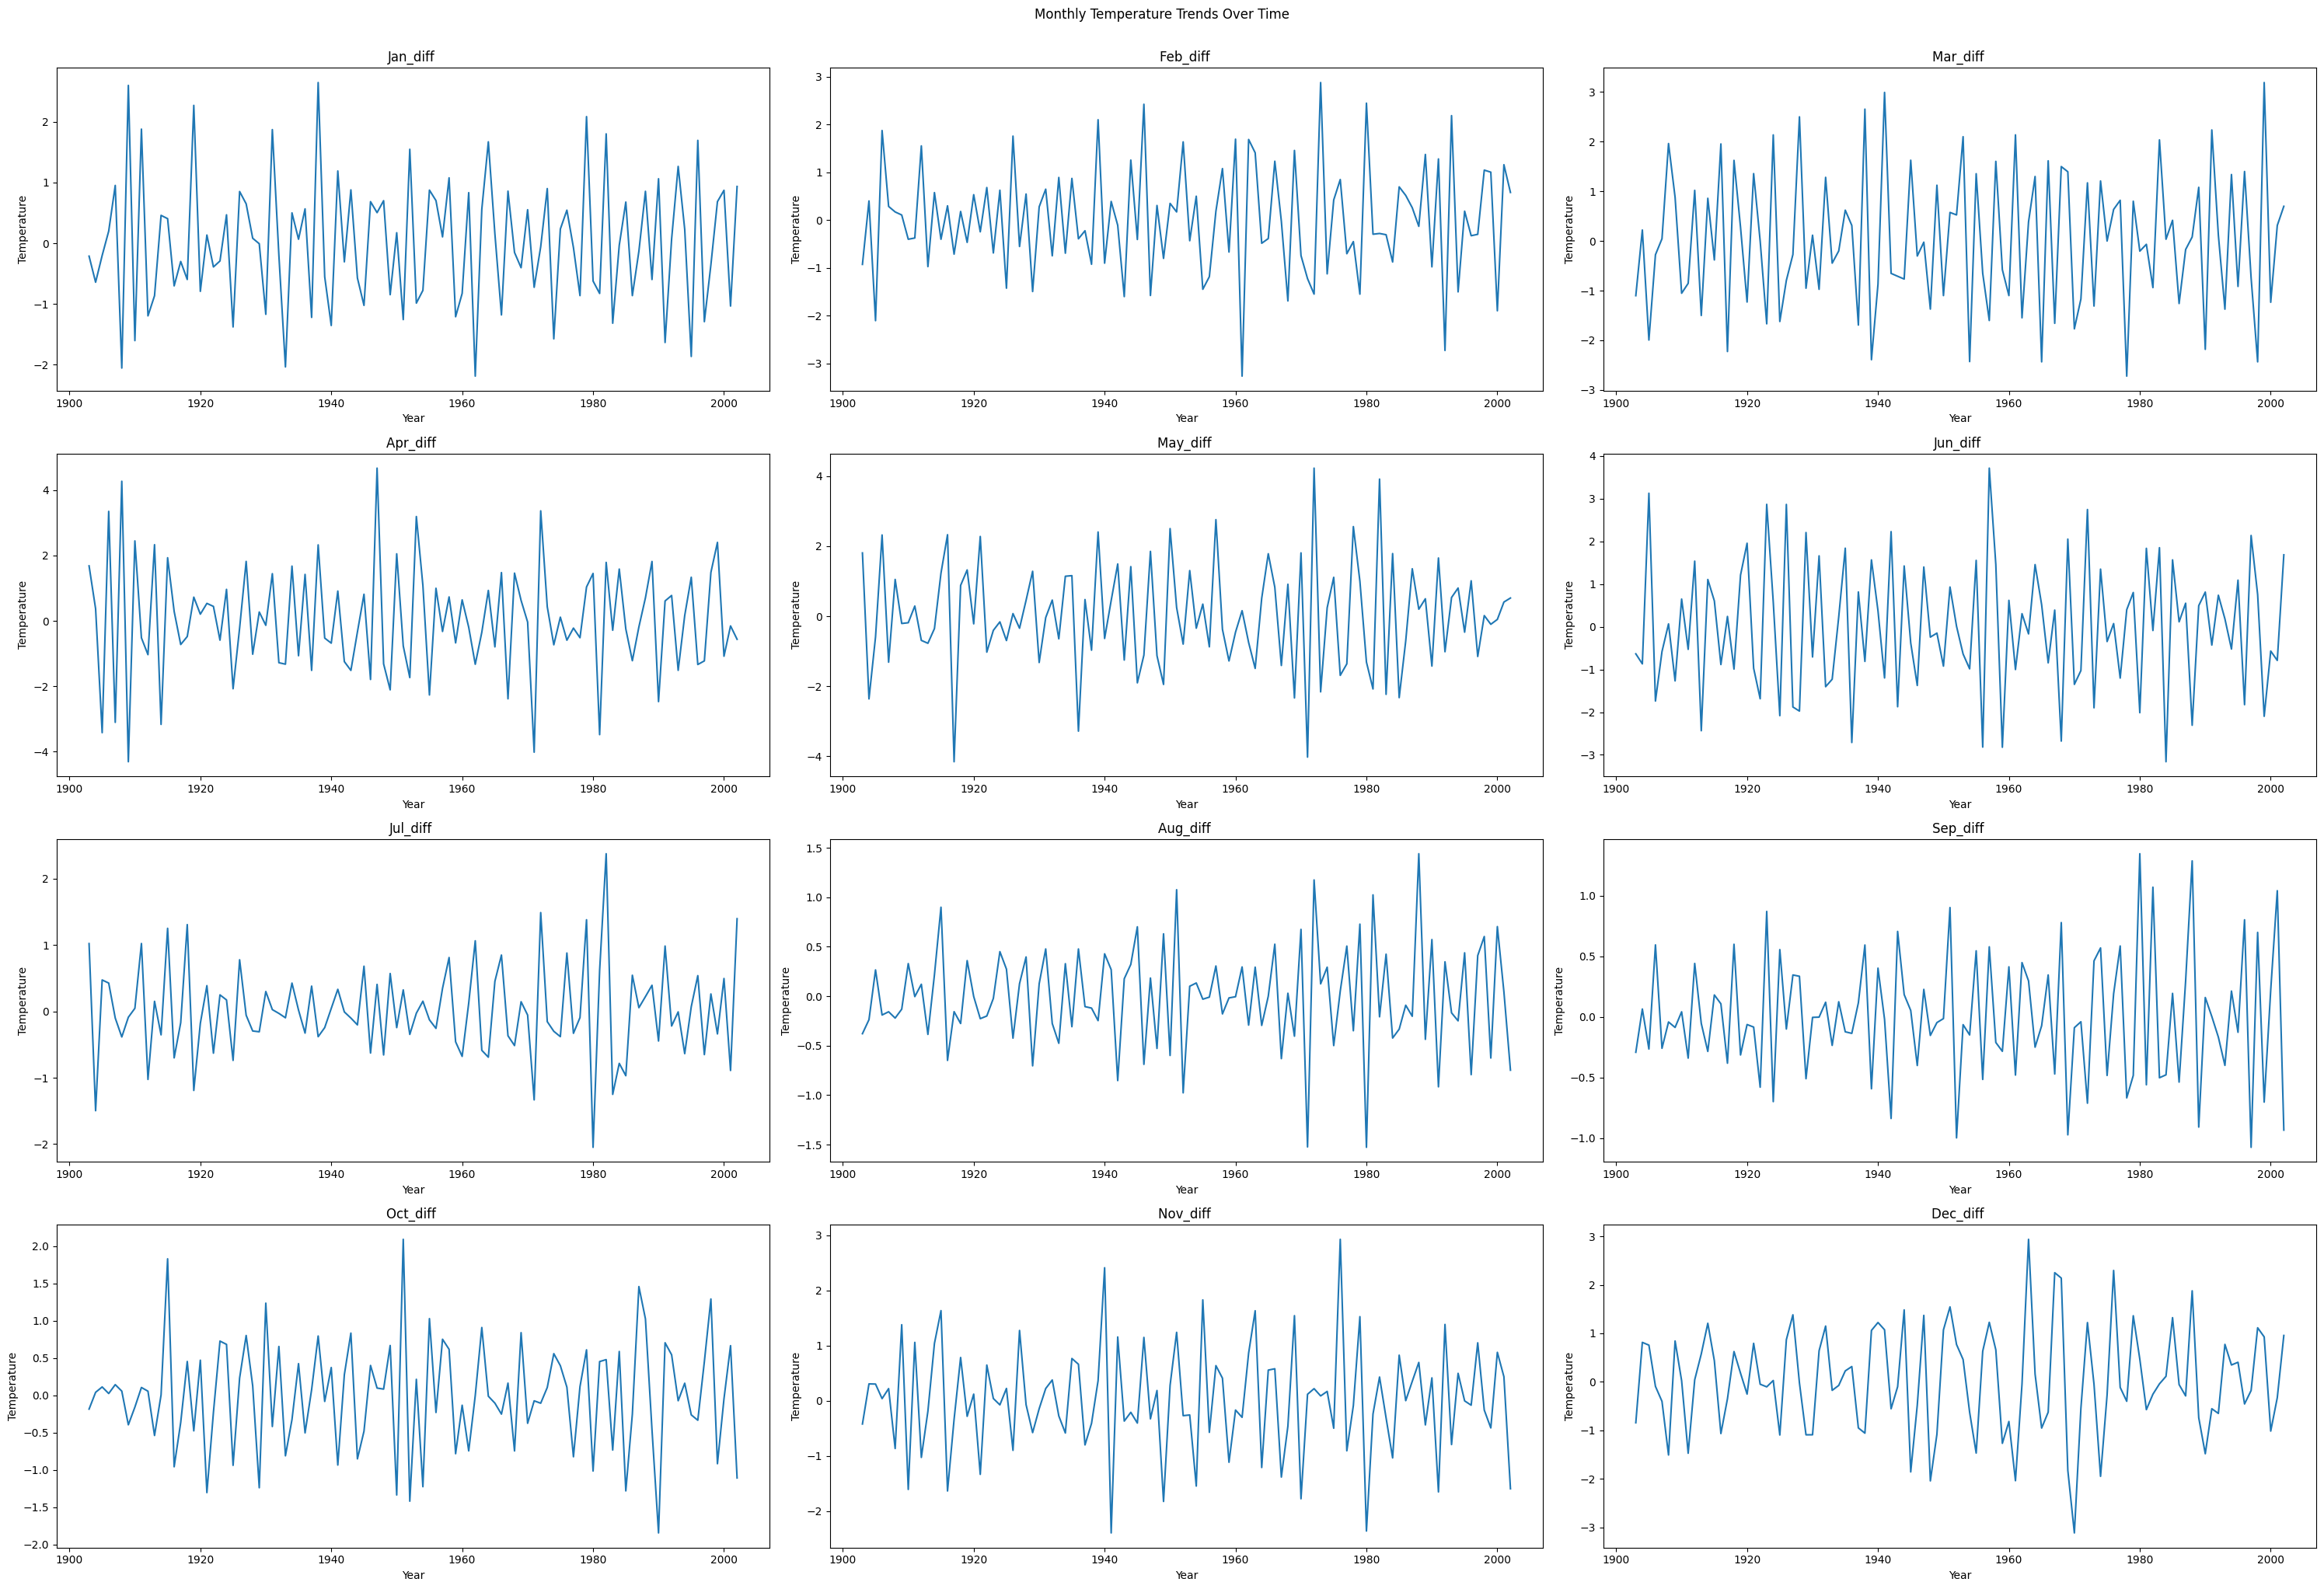

In [44]:
# plotting all stationary graph
# plot figute
plt_figures(all_stationary_data)

In [45]:
a=[1,2,3,4]
a=pd.DataFrame(a)
a

,0
0,1
1,2
2,3
3,4


In [46]:
a.cumsum()

,0
0,1
1,3
2,6
3,10


### finding p(ar) and q(ma) value acf plot and pacf plot 

<BarContainer object of 13 artists>

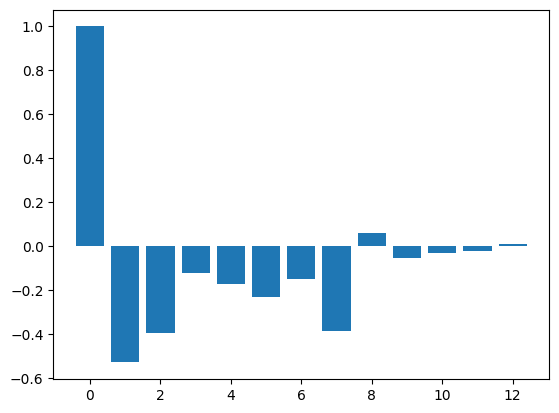

In [47]:
# from pacf getting p -value
from statsmodels.tsa.stattools import acf,pacf

pacf_val=pacf(all_stationary_data["Mar_diff"])
plt.bar(range(13),pacf_val[:13])


In [48]:
pacf_val[1:13]

array([-0.52905882, -0.39445482, -0.12390753, -0.17046575, -0.23013309,
       -0.14833765, -0.38434027,  0.05971147, -0.05186135, -0.02895379,
       -0.02395451,  0.01134907])

In [49]:
np.sort(pacf_val[1:13])

array([-0.52905882, -0.39445482, -0.38434027, -0.23013309, -0.17046575,
       -0.14833765, -0.12390753, -0.05186135, -0.02895379, -0.02395451,
        0.01134907,  0.05971147])

<BarContainer object of 12 artists>

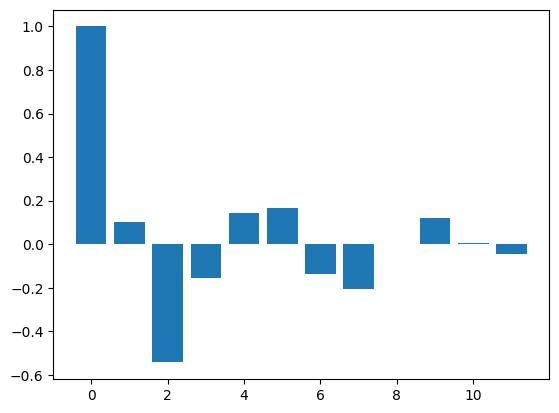

In [50]:
acf_val=acf(all_stationary_data["Dec_diff"],nlags=11)
plt.bar(range(12),acf_val)


In [51]:
for i in range(12,1):
    print(i)

In [52]:
def find_cutoff(values,lags=12, threshold=0.35):  # Adjust threshold if needed
    for i in range(1,lags):  # Ignore lag 0
        if abs(values[lags-i]) > threshold: 
            print(abs(values[lags-i]))
            return lags-i   # Return the last significant lag
    return len(values) - 1 

In [53]:
find_cutoff(pacf_val)

0.3843402713431883


7

In [54]:
all_stationary_data.columns

Index(['Jan_diff', 'Feb_diff', 'Mar_diff', 'Apr_diff', 'May_diff', 'Jun_diff',
       'Jul_diff', 'Aug_diff', 'Sep_diff', 'Oct_diff', 'Nov_diff', 'Dec_diff'],
      dtype='object')

In [55]:
from statsmodels.tsa.stattools import acf, pacf
import pandas as pd

def find_cutoff(values,lags=12, threshold=0.35):  # Adjust threshold if needed
    for i in range(1,lags):  # Ignore lag 0
        if abs(values[lags-i]) > threshold: 
            return lags-i   # Return the last significant lag
    return len(values) - 1 

def finding_P_Q_value(all_stationary_data, lags=12, threshold=0.35):
    """Finds optimal p (AR) and q (MA) values for each time series column."""
    p_q_val = pd.DataFrame()
    p_val = []
    q_val = []

    for month in all_stationary_data.columns:
        acf_values = acf(all_stationary_data[month], nlags=lags)   
        pacf_values = pacf(all_stationary_data[month], nlags=lags)

        p = find_cutoff(pacf_values, threshold=threshold)  # Finding AR order
        q = find_cutoff(acf_values, threshold=threshold)   # Finding MA order

        p_val.append(p)
        q_val.append(q)

    p_q_val["Month"] = all_stationary_data.columns
    p_q_val["p"] = p_val
    p_q_val["q"] = q_val

    return p_q_val


In [56]:
p_d_q_val=finding_P_Q_value(all_stationary_data=all_stationary_data,lags=12,threshold=.35)

In [57]:
p_d_q_val["d"]=all_months_d_val.d

In [58]:
p_d_q_val

,Month,p,q,d
0,Jan_diff,2,1,1
1,Feb_diff,1,1,1
2,Mar_diff,7,1,0
3,Apr_diff,2,1,0
4,May_diff,1,1,0
5,Jun_diff,2,1,0
6,Jul_diff,2,1,0
7,Aug_diff,1,1,0
8,Sep_diff,1,1,0
9,Oct_diff,1,1,1


In [59]:
# plot pacf
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import acf,pacf
def plot_pacf_data(all_stationary_data,lags=12):
    plt.figure(figsize=(30,20))
    
    for i,month in enumerate(all_stationary_data.columns):
        
        plt.subplot(4,3,i+1)
        pacf_val=pacf(all_stationary_data[month])
        # plt.bar(range(lags),pacf_val[:lags])
        plt.plot(all_stationary_data[month])
        # plt.tight_layout()
        
    plt.show()

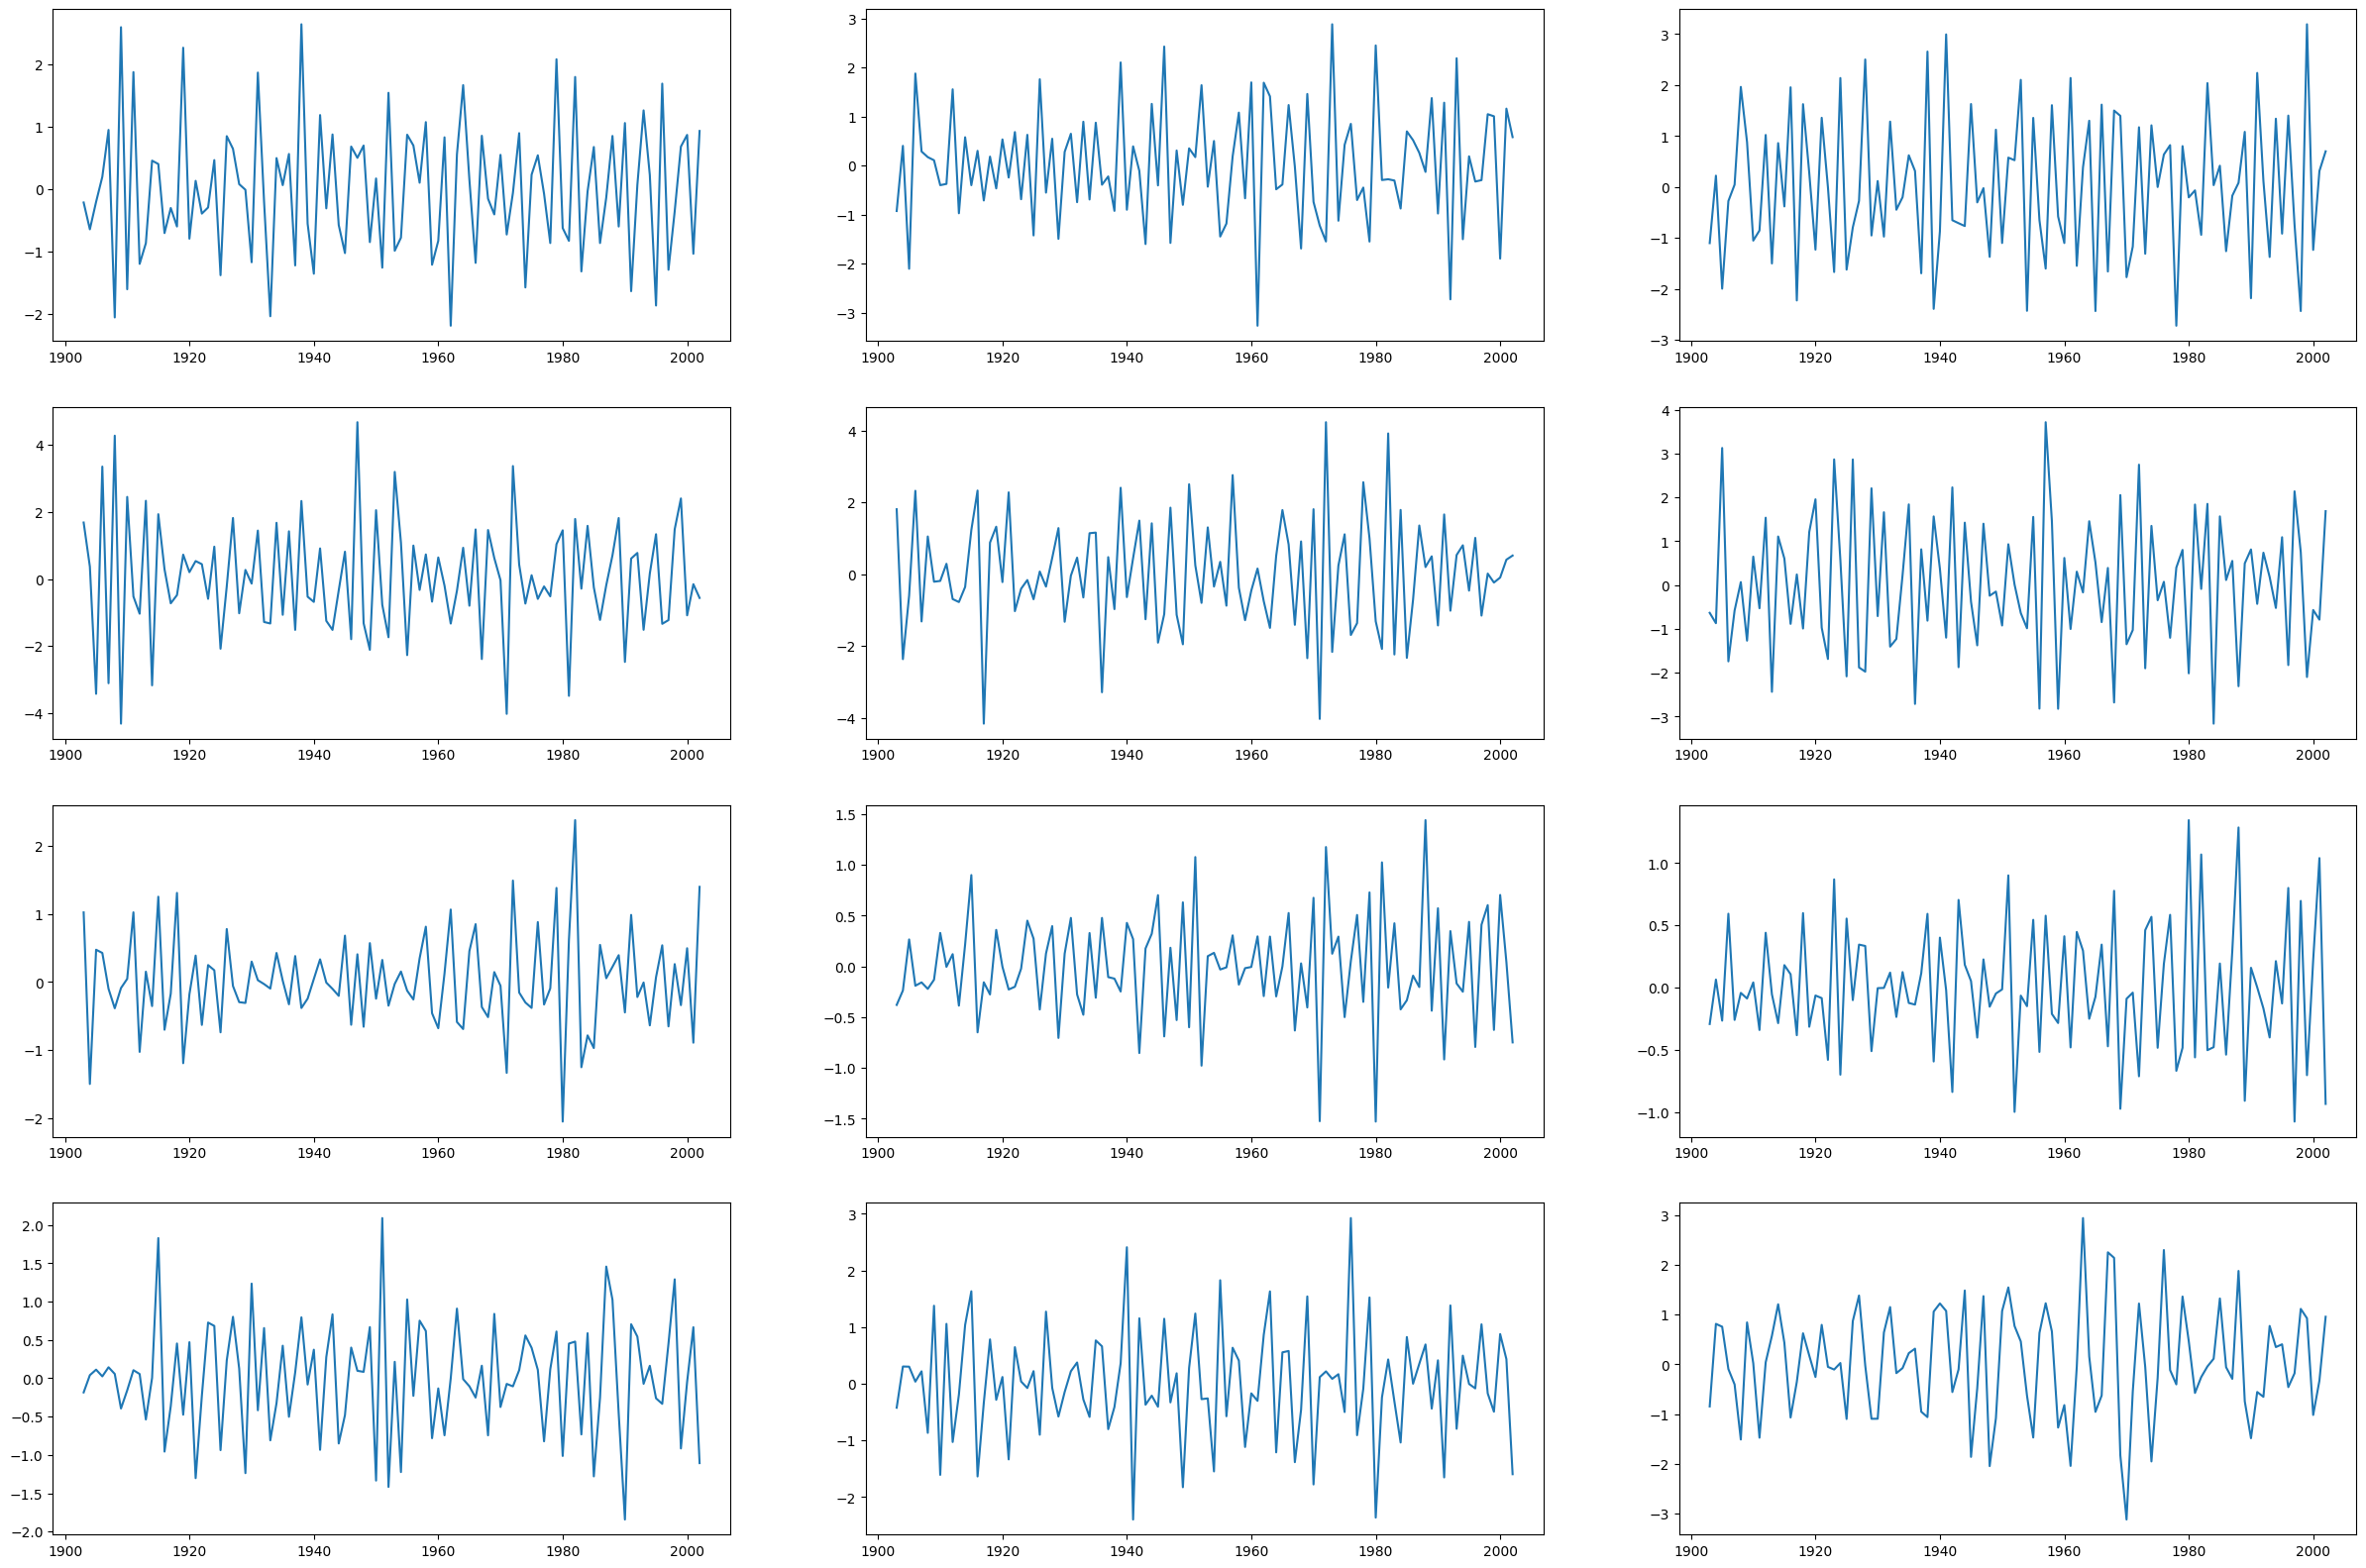

In [60]:
plot_pacf_data(all_stationary_data)

In [61]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
import math

# Function to plot PACF for all months
def plot_pacf_data(all_stationary_data, lags=12):
    num_cols = len(all_stationary_data.columns)
    
    # Dynamically calculate the grid size
    rows = math.ceil(num_cols / 3)  # At most 3 columns per row
    cols = min(num_cols, 3)  # Max 3 columns

    plt.figure(figsize=(cols * 5, rows * 4))  # Adjust figure size dynamically

    for i, month in enumerate(all_stationary_data.columns):
        plt.subplot(rows, cols, i + 1)
        plot_pacf(all_stationary_data[month], lags=lags, ax=plt.gca())  # Use `ax=plt.gca()` for correct subplot placement
        plt.title(f"PACF of {month}")

    plt.suptitle('Partial Autocorrelation Function (PACF) for Each Month', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent overlap

    plt.show()


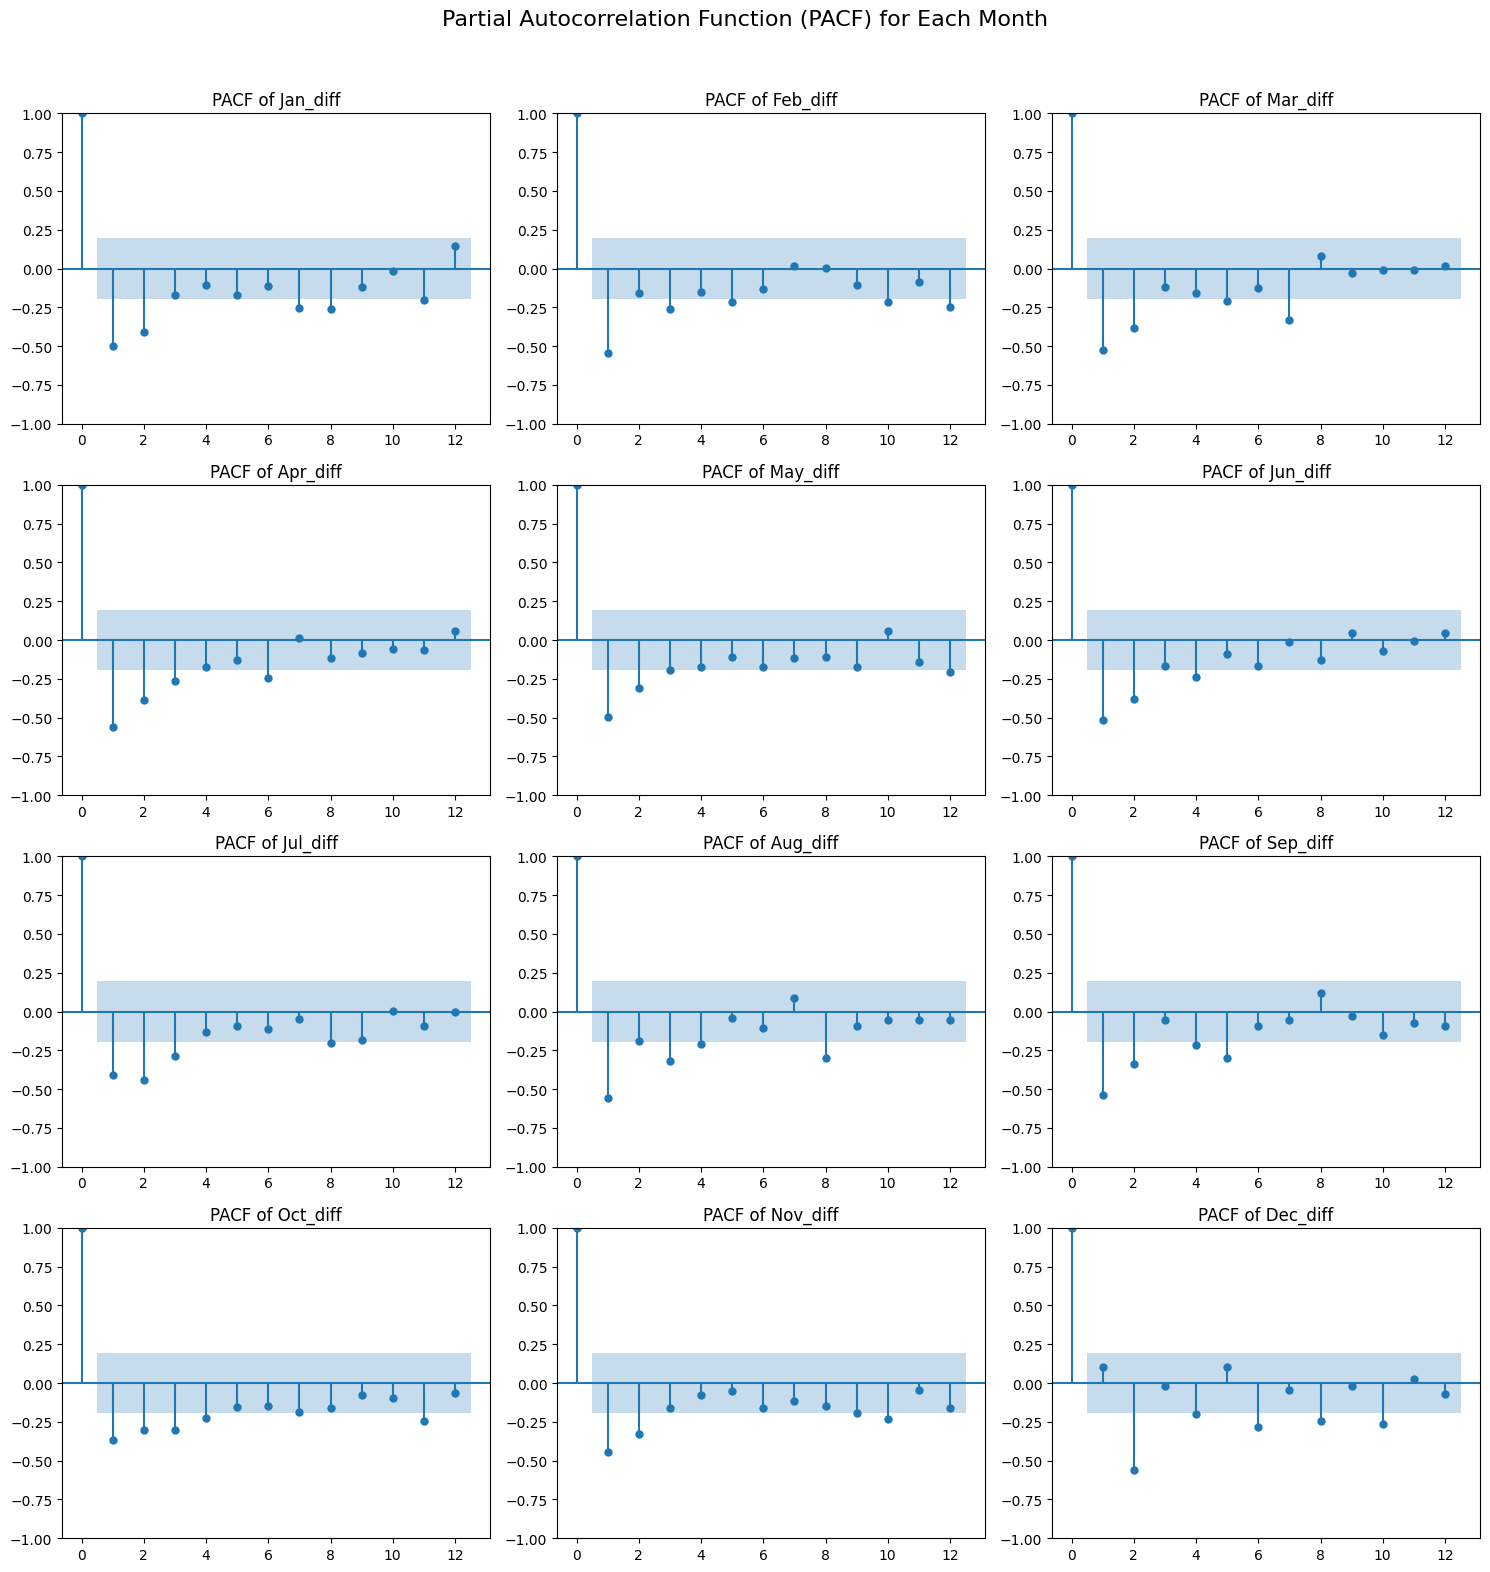

In [62]:
plot_pacf_data(all_stationary_data,lags=12)

In [63]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import math

# Function to plot PACF for all months
def plot_acf_data(all_stationary_data, lags=12):
    num_cols = len(all_stationary_data.columns)
    
    # Dynamically calculate the grid size
    rows = math.ceil(num_cols / 3)  # At most 3 columns per row
    cols = min(num_cols, 3)  # Max 3 columns

    plt.figure(figsize=(cols * 5, rows * 4))  # Adjust figure size dynamically

    for i, month in enumerate(all_stationary_data.columns):
        plt.subplot(rows, cols, i + 1)
        plot_acf(all_stationary_data[month], lags=lags, ax=plt.gca())  # Use `ax=plt.gca()` for correct subplot placement
        plt.title(f"PACF of {month}")

    plt.suptitle('Autocorrelation Function (ACF) for Each Month', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent overlap

    plt.show()


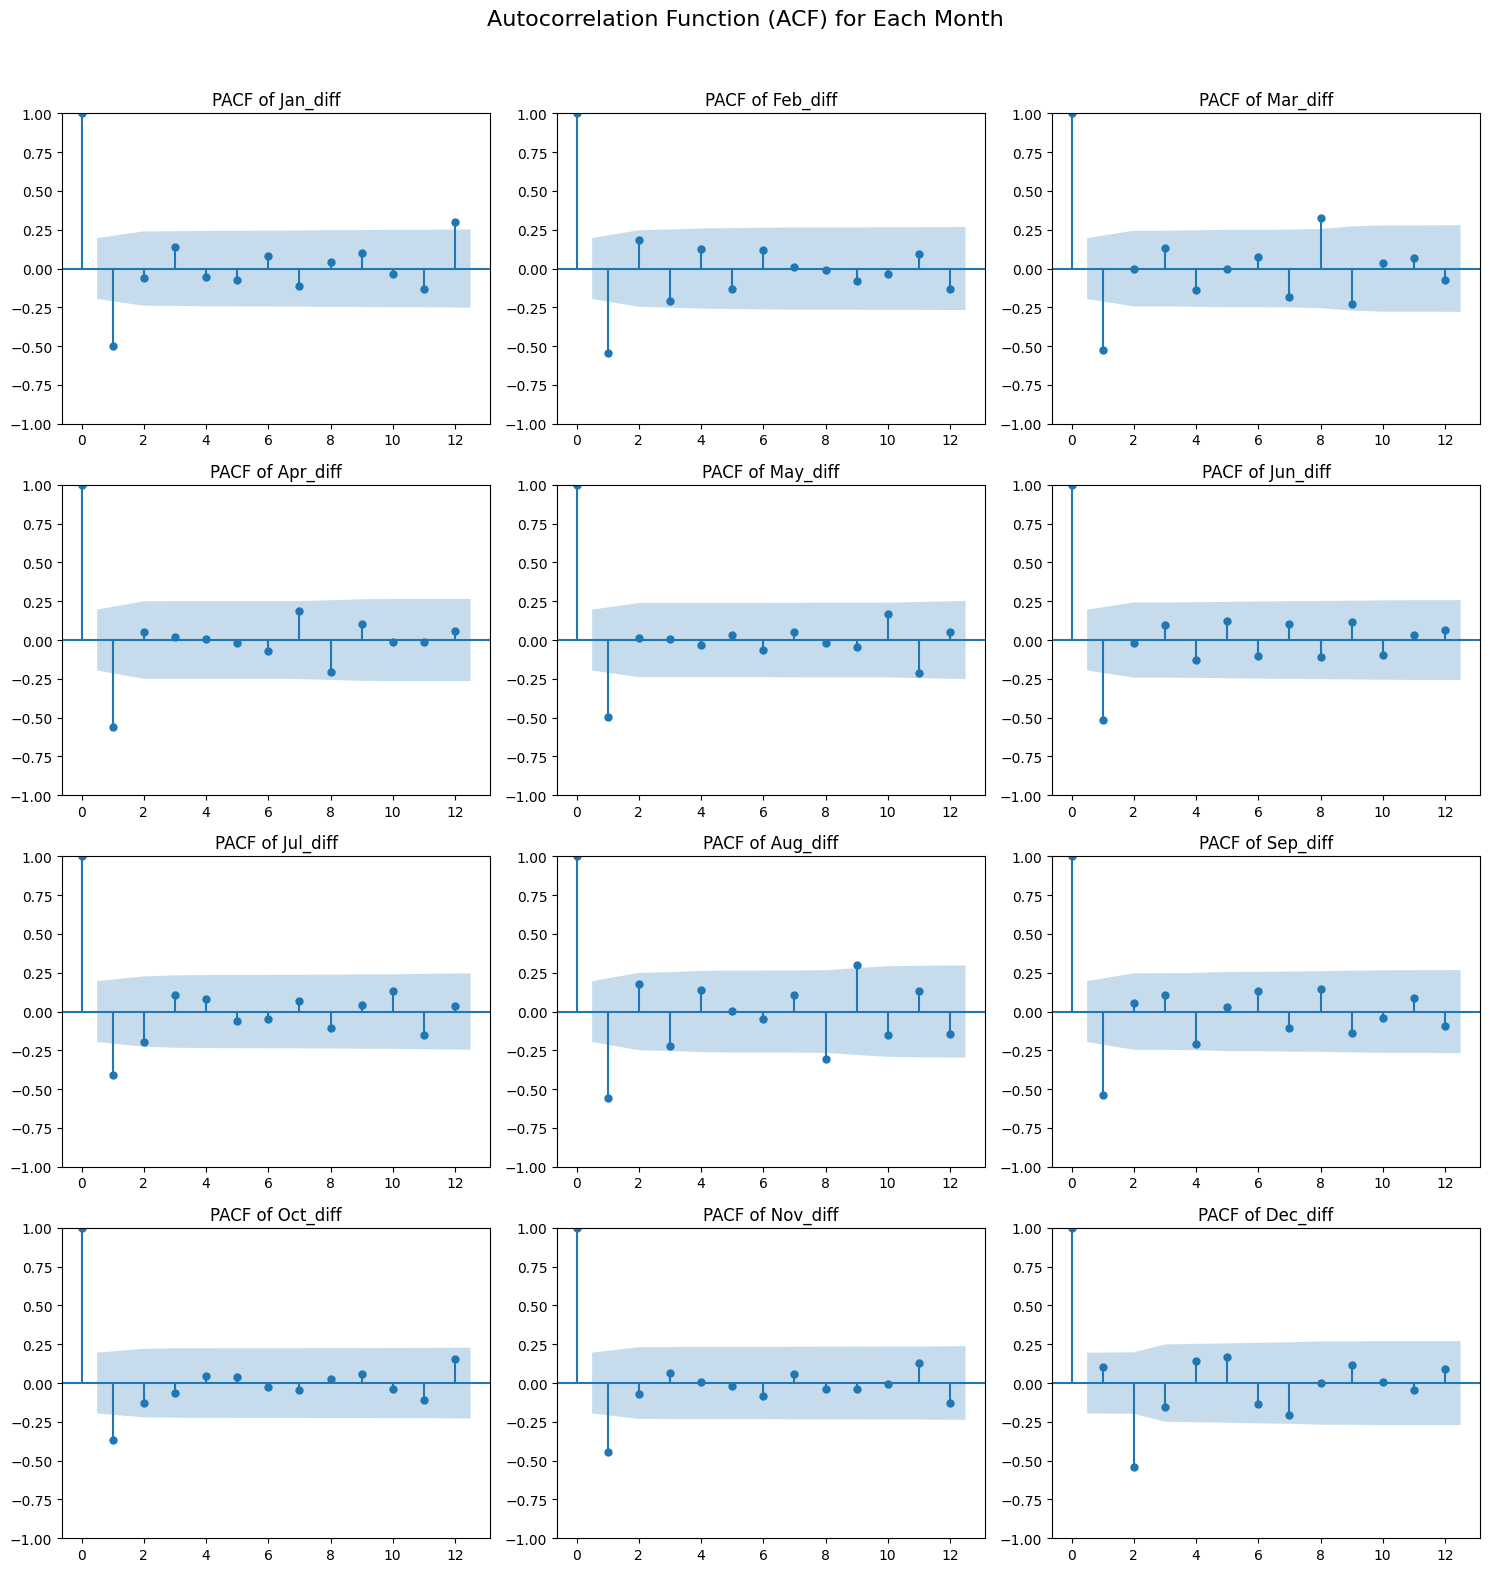

In [64]:
plot_acf_data(all_stationary_data,lags=12)


In [65]:
# p_d_q_val
# all_stationary_data

In [66]:
p_d_q_val

,Month,p,q,d
0,Jan_diff,2,1,1
1,Feb_diff,1,1,1
2,Mar_diff,7,1,0
3,Apr_diff,2,1,0
4,May_diff,1,1,0
5,Jun_diff,2,1,0
6,Jul_diff,2,1,0
7,Aug_diff,1,1,0
8,Sep_diff,1,1,0
9,Oct_diff,1,1,1


### model train 

In [67]:
# train test split
split_per=70
split_size=int(len(all_stationary_data)*(split_per/100))
train_data=all_stationary_data[:split_size]
test_data=all_stationary_data[split_size:]

In [ ]:
# # train test split
# split_per=70
# split_size=int(len(df)*(split_per/100))
# train_data=df[:split_size]
# test_data=df[split_size:]

In [69]:
from statsmodels.tsa.arima.model import ARIMA
month="Mar_diff"
mon="Mar"
# Define ARIMA model with (p,d,q) order
model = ARIMA(train_data[month], order=(7, 1, 1))

# Fit the model
model_fit = model.fit()

# Print summary
print(model_fit.summary())


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\projects\internship\

                               SARIMAX Results                                
Dep. Variable:               Mar_diff   No. Observations:                   70
Model:                 ARIMA(7, 1, 1)   Log Likelihood                 -98.546
Date:                Tue, 18 Feb 2025   AIC                            215.092
Time:                        23:52:55   BIC                            235.199
Sample:                    01-01-1903   HQIC                           223.069
                         - 01-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9762      0.131     -7.452      0.000      -1.233      -0.719
ar.L2         -0.9666      0.193     -4.998      0.000      -1.346      -0.588
ar.L3         -0.8600      0.202     -4.268      0.0

In [70]:
#get prediction start and end dates
pred_start_date = test_data[month].index[0]
pred_end_date = test_data[month].index[-1]

In [71]:
# #get the predictions and residuals
# pred = model_fit.predict(start=pred_start_date, end=pred_end_date)
# pred=pred.cumsum()+df[mon].iloc[split_size+1]
# acc=test_data[month].cumsum()+df[mon].iloc[split_size+1]
# residuals = pred - acc


In [72]:
#get the predictions and residuals
pred = model_fit.predict(start=pred_start_date, end=pred_end_date)
# pred=pred.cumsum()+df[mon].iloc[split_size+1]
acc=test_data[month]
residuals = pred - acc


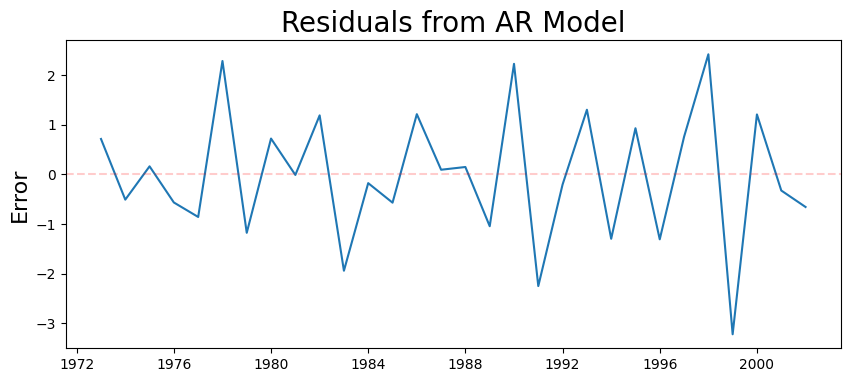

In [73]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'temp')

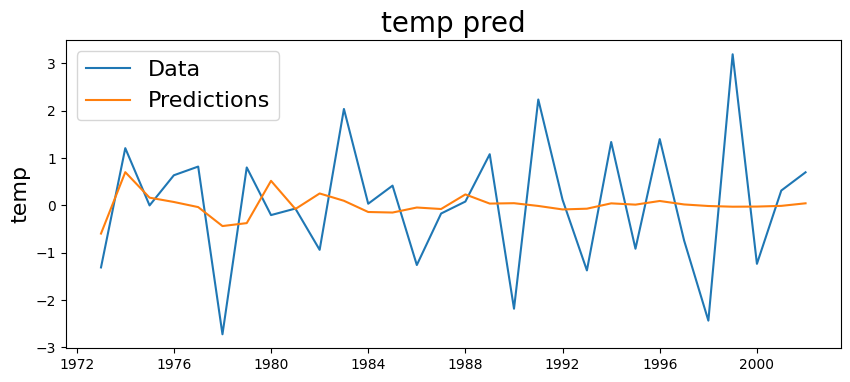

In [74]:
plt.figure(figsize=(10,4))

# plt.plot(test_data[month])
# plt.plot(predictions)
plt.plot(acc)
plt.plot(pred)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('temp pred', fontsize=20)
plt.ylabel('temp', fontsize=16)

In [75]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.3158639631401217


### rolling window ARIMA

In [84]:
rolling_predictions = test_data[month].copy()
rolling_predictions["1973-01-01"]

np.float64(-1.311)

In [76]:
from datetime import timedelta

rolling_predictions = test_data[month].copy()

for train_end in test_data[month].index:
    train_data = all_stationary_data[:train_end-timedelta(days=1)]
    model = ARIMA(train_data[month], order=(2, 1, 1))
    model_fit = model.fit()
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred
    
    # print(pred)
    # print(train_data.tail())

d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\subha\AppData\Local\Temp\ipykernel_16456\3038303783.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
d:\projects\internship\werather_forcastiing\ven

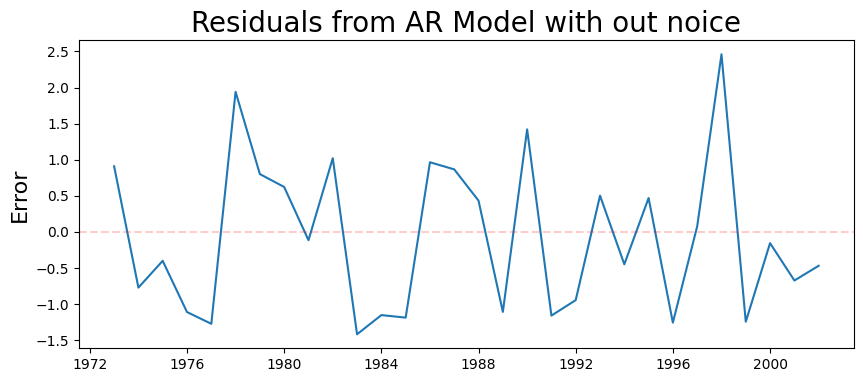

In [77]:
# pred=rolling_predictions.cumsum()+df[mon].iloc[split_size+1]
# acc=test_data[month].cumsum()+df[mon].iloc[split_size+1]
err_no_noice = rolling_predictions-test_data[month]
plt.figure(figsize=(10,4))
plt.plot(err_no_noice)
plt.title('Residuals from AR Model with out noice', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

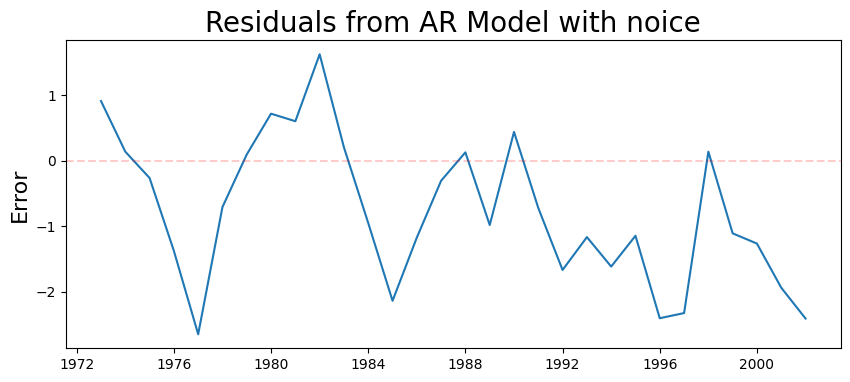

In [78]:
pred=rolling_predictions.cumsum()+df[mon].iloc[split_size+1]
acc=test_data[month].cumsum()+df[mon].iloc[split_size+1]
err_with_noice = pred-acc
plt.figure(figsize=(10,4))
plt.plot(err_with_noice)
plt.title('Residuals from AR Model with noice', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'temp')

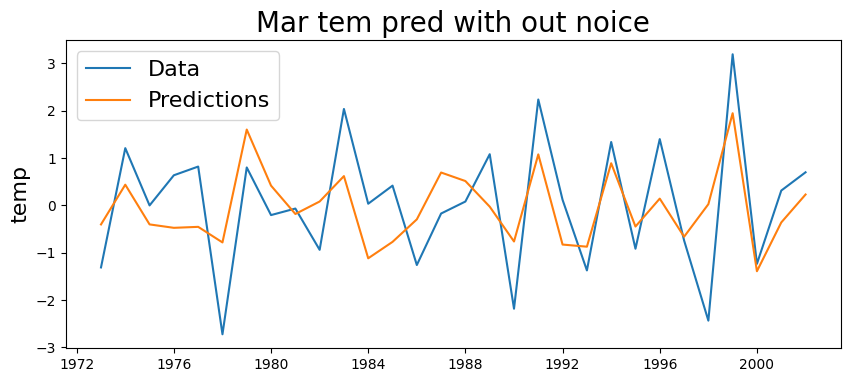

In [79]:
plt.figure(figsize=(10,4))

# plt.plot(df[mon])
plt.plot(test_data[month])
# plt.plot(pred)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title(f'{mon} tem pred with out noice', fontsize=20)
plt.ylabel('temp', fontsize=16)

Text(0, 0.5, 'temp')

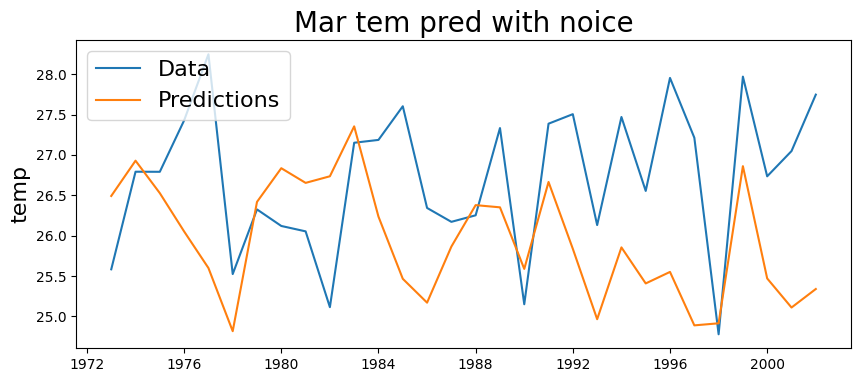

In [80]:
plt.figure(figsize=(10,4))

plt.plot(acc)
# plt.plot(test_data[month])
plt.plot(pred)
# plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title(f'{mon} tem pred with noice', fontsize=20)
plt.ylabel('temp', fontsize=16)

In [81]:
print('Mean Absolute Percent Error with noice:', round(np.mean(abs(err/acc)),4))

NameError: name 'err' is not defined

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1.047971193068451


### in SARIMA model


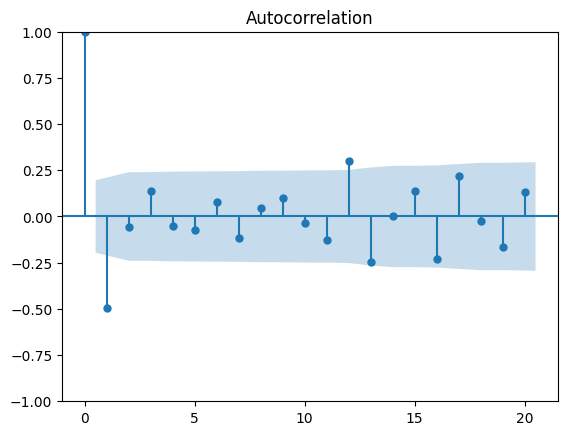

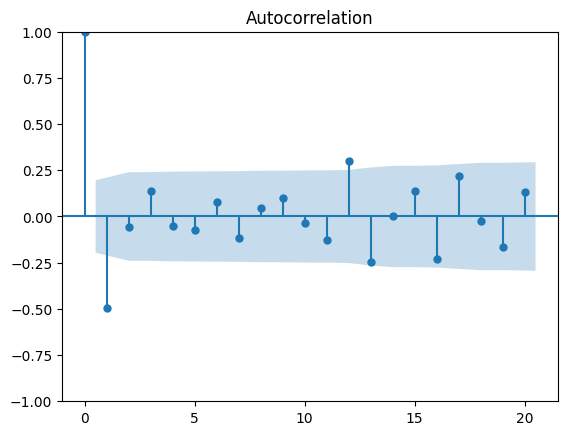

In [ ]:
plot_acf(all_stationary_data[month],lags=20)

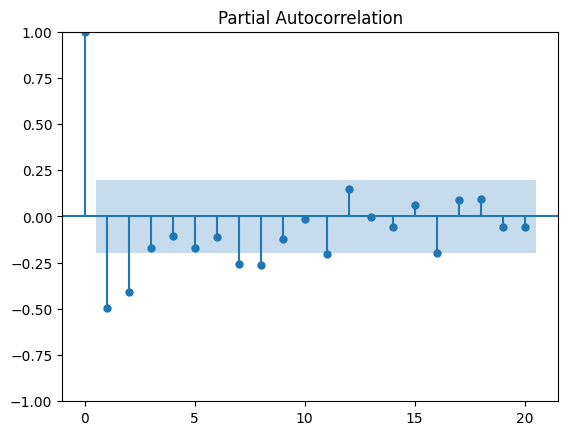

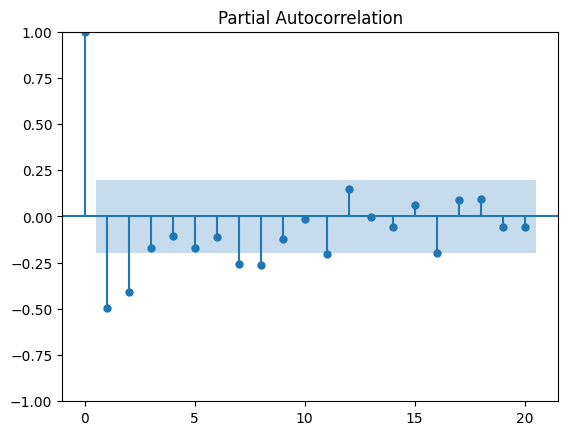

In [ ]:
plot_pacf(all_stationary_data[month],lags=20)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
my_order = (0,1,0)
my_seasonal_order = (2, 0, 1, 12)
model = SARIMAX(train_data[month], order=my_order, seasonal_order=my_seasonal_order)
# Fit the model
model_fit = model.fit()

# Print summary
print(model_fit.summary())

d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                             Jan_diff   No. Observations:                   90
Model:             SARIMAX(0, 1, 0)x(2, 0, [1], 12)   Log Likelihood                -171.412
Date:                              Sun, 16 Feb 2025   AIC                            350.823
Time:                                      00:05:39   BIC                            360.778
Sample:                                  01-01-1903   HQIC                           354.835
                                       - 01-01-1992                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.3486      0.269      5.011      0.000       0.821       1.876
ar.S.L24      -0.53

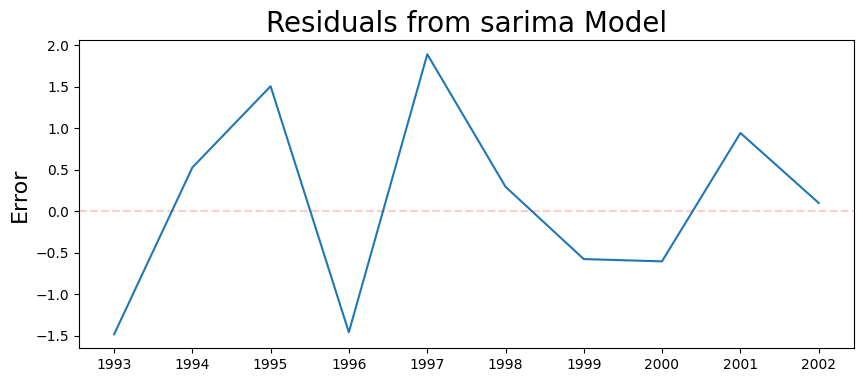

In [ ]:
#get prediction start and end dates
pred_start_date = test_data[month].index[0]
pred_end_date = test_data[month].index[-1]
# #get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
pred=predictions.cumsum()+df["Jan"].iloc[split_size+1]
acc=test_data[month].cumsum()+df["Jan"].iloc[split_size+1]
residuals = pred - acc
plt.figure(figsize=(10,4))
plt.plot(err)
plt.title('Residuals from sarima Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'temp')

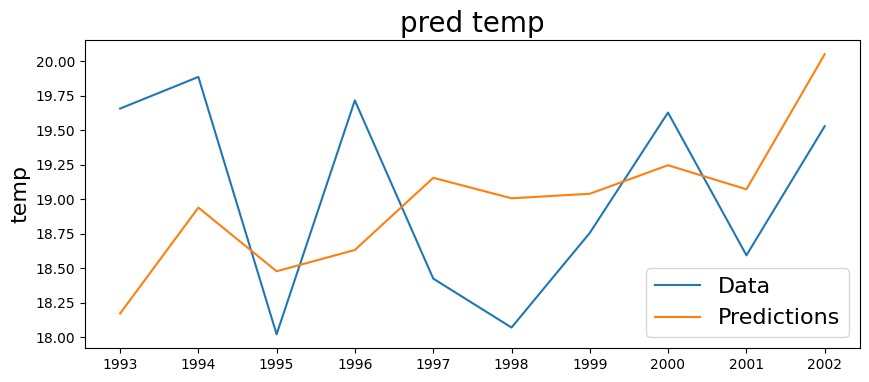

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(acc)
plt.plot(pred)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('pred temp', fontsize=20)
plt.ylabel('temp', fontsize=16)

### rolling window

In [ ]:
from datetime import timedelta

rolling_predictions = test_data[month].copy()

for train_end in test_data[month].index:
    train_data_roll = all_stationary_data[:train_end-timedelta(days=1)]
    # model = ARIMA(train_data_roll["Jan"], order=(2, 1, 1))
    my_order = (0,1,0)
    my_seasonal_order = (2, 0, 1, 12)
    model = SARIMAX(train_data_roll[month], order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred
    
    # print(pred)
    # print(train_data.tail())

d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\subha\AppData\Local\Temp\ipykernel_13348\2344248996.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
d:\projects\internship\werather_forcastiing\ven

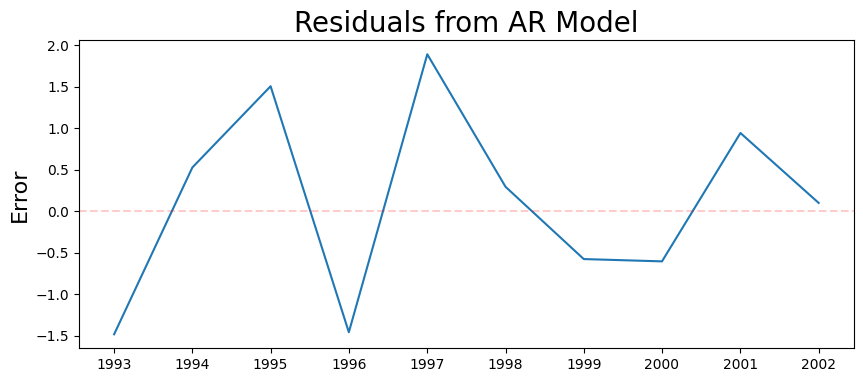

In [ ]:
pred=rolling_predictions.cumsum()+df["Jan"].iloc[split_size+1]
acc=test_data[month].cumsum()+df["Jan"].iloc[split_size+1]
err = pred-acc
plt.figure(figsize=(10,4))
plt.plot(err)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'temp')

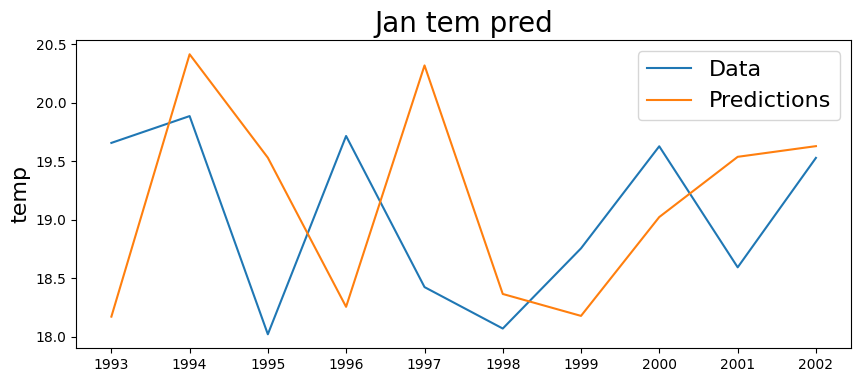

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(acc)
plt.plot(pred)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Jan tem pred', fontsize=20)
plt.ylabel('temp', fontsize=16)
# for year in range(start_date.Year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)